# Generating SQL for SQLite using Ollama, ChromaDB
This notebook runs through the process of using the `vanna` Python package to generate SQL using AI (RAG + LLMs) including connecting to a database and training. If you're not ready to train on your own database, you can still try it using a sample [SQLite database](app.md).


<h3 class="mb-5 text-lg font-medium text-gray-900 dark:text-white">Which LLM do you want to use?</h3>
<ul class="grid w-full gap-6 md:grid-cols-2">
    
  <li>
    <a href="../sqlite-openai-vanna-vannadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">OpenAI via Vanna.AI (Recommended)</div>
        <small class="w-full">Use Vanna.AI for free to generate your queries</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-openai-standard-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">OpenAI</div>
        <small class="w-full">Use OpenAI with your own API key</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-openai-azure-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Azure OpenAI</div>
        <small class="w-full">If you have OpenAI models deployed on Azure</small>
      </div>
    </a>
  </li>
    
  <li>
    <span class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border bg-white p-5 border-blue-600 text-blue-600 dark:bg-gray-800 dark:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold"><span class="hidden">[Selected]</span> Ollama</div>
        <small class="w-full">Use Ollama locally for free. Requires additional setup.</small>
      </div>
    </span>
  </li>
  
  <li>
    <a href="../sqlite-mistral-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Mistral via Mistral API</div>
        <small class="w-full">If you have a Mistral API key</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-other-llm-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Other LLM</div>
        <small class="w-full">If you have a different LLM model</small>
      </div>
    </a>
  </li>
    
</ul>
    


<h3 class="mb-5 text-lg font-medium text-gray-900 dark:text-white">Where do you want to store the 'training' data?</h3>
<ul class="grid w-full gap-6 md:grid-cols-2">
    
  <li>
    <a href="../sqlite-ollama-vannadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Vanna Hosted Vector DB (Recommended)</div>
        <small class="w-full">Use Vanna.AIs hosted vector database (pgvector) for free. This is usable across machines with no additional setup.</small>
      </div>
    </a>
  </li>
    
  <li>
    <span class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border bg-white p-5 border-blue-600 text-blue-600 dark:bg-gray-800 dark:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold"><span class="hidden">[Selected]</span> ChromaDB</div>
        <small class="w-full">Use ChromaDBs open-source vector database for free locally. No additional setup is necessary -- all database files will be created and stored locally.</small>
      </div>
    </span>
  </li>
  
  <li>
    <a href="../sqlite-ollama-marqo/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Marqo</div>
        <small class="w-full">Use Marqo locally for free. Requires additional setup. Or use their hosted option.</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-ollama-other-vectordb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Other VectorDB</div>
        <small class="w-full">Use any other vector database. Requires additional setup.</small>
      </div>
    </a>
  </li>
    
</ul>
    

## Setup

In [1]:
import warnings
import re

warnings.filterwarnings('ignore', category=DeprecationWarning, message='^Number of requested results')
# warnings.filterwarnings('ignore', category=DeprecationWarning, message=re.escape(r'^Some regex pattern'))

import os

import re
from time import time
from datetime import datetime 

from vanna.ollama import Ollama
from vanna.chromadb.chromadb_vector import ChromaDB_VectorStore

In [2]:
model_name = "granite-code:8b" # "qwen2.5:14b" # "qwen2.5" # 'deepseek-coder-v2'
CONFIG = {
    'model': model_name,   
}

file_db = "~/Downloads/chinook.sqlite"

clean_and_train = True  # False  

sql_id = 1
NUM_RETRY = 3

allow_llm_to_see_data = True
# allow_llm_to_see_data (bool): Whether to allow the LLM to see the data (for the purposes of introspecting the data to generate the final SQL).

In [3]:
class MyVanna(ChromaDB_VectorStore, Ollama):
    def __init__(self, config=None):
        ChromaDB_VectorStore.__init__(self, config=config)
        Ollama.__init__(self, config=config)

def remove_collections(collection_name=None, ACCEPTED_TYPES = ["sql", "ddl", "documentation"]):
    if not collection_name:
        collections = ACCEPTED_TYPES
    elif isinstance(collection_name, str):
        collections = [collection_name]
    elif isinstance(collection_name, list):
        collections = collection_name
    else:
        print(f"\t{collection_name} is unknown: Skipped")
        return

    for c in collections:
        if not c in ACCEPTED_TYPES:
            print(f"\t{c} is unknown: Skipped")
            continue
            
        # print(f"vn.remove_collection('{c}')")
        vn.remove_collection(c)

def strip_brackets(ddl):
    """
    This function removes square brackets from table and column names in a DDL script.
    
    Args:
        ddl (str): The DDL script containing square brackets.
    
    Returns:
        str: The DDL script with square brackets removed.
    """
    # Use regular expressions to match and replace square brackets
    pattern = r"\[([^\]]+)]"  # Match any character except ] within square brackets
    return re.sub(pattern, r"\1", ddl)

def my_vn_ask(question, sql_id, allow_llm_to_see_data=False, num_retry=NUM_RETRY, separator=80*'='):
    # allow retry by appending error msg to question
    print(f"\n{separator}\n# QUESTION - {sql_id}:  {question}\n{separator}\n")
    sql, df, fig, err_msg = vn.ask(question=question, allow_llm_to_see_data=allow_llm_to_see_data)
    if not err_msg or ("[ERROR-SQL]" not in err_msg) and ("[ERROR-DB]" not in err_msg):
        return sql, df, fig, err_msg

    if err_msg and "an unknown error was encountered while running the model" in err_msg:
        # re-run
        sql, df, fig, err_msg = vn.ask(question=question, allow_llm_to_see_data=allow_llm_to_see_data)
        if not err_msg or ("[ERROR-SQL]" not in err_msg) and ("[ERROR-DB]" not in err_msg):
            return sql, df, fig, err_msg
        
    # re-try
    for i_retry in range(num_retry-1):
        msg = f"*** RETRY {i_retry+1} ***" 
        print(msg)
        question = f"""
        For the question {question}, 
        the generated SQL statement {sql} results in the following exception {err_msg} .
        Please fix the error and re-generate the SQL
        """
        
        sql, df, fig, err_msg = vn.ask(question=question, allow_llm_to_see_data=allow_llm_to_see_data)
        if not err_msg or ("[ERROR-SQL]" not in err_msg) and ("[ERROR-DB]" not in err_msg):
            break       

    return sql, df, fig, err_msg  

In [4]:
vn = MyVanna(config=CONFIG)

In [5]:
hostname = os.uname().nodename
print("Hostname:", hostname)

Hostname: ducklover1


In [6]:
file_db = os.path.abspath(os.path.expanduser(file_db))
vn.connect_to_sqlite(file_db)

In [7]:
vn.run_sql_is_set

True

In [8]:
if clean_and_train:
    remove_collections()

## Training

### [SQLite sample database](https://www.sqlitetutorial.net/sqlite-sample-database/)

You only need to train once. Do not train again unless you want to add more training data.

In [9]:
df_ddl = vn.run_sql("SELECT type, sql FROM sqlite_master WHERE sql is not null")

In [10]:
df_ddl

,type,sql
0,table,"CREATE TABLE ""albums""\r\n(\r\n [AlbumId] IN..."
1,table,"CREATE TABLE sqlite_sequence(name,seq)"
2,table,"CREATE TABLE ""artists""\r\n(\r\n [ArtistId] ..."
3,table,"CREATE TABLE ""customers""\r\n(\r\n [Customer..."
4,table,"CREATE TABLE ""employees""\r\n(\r\n [Employee..."
5,table,"CREATE TABLE ""genres""\r\n(\r\n [GenreId] IN..."
6,table,"CREATE TABLE ""invoices""\r\n(\r\n [InvoiceId..."
7,table,"CREATE TABLE ""invoice_items""\r\n(\r\n [Invo..."
8,table,"CREATE TABLE ""media_types""\r\n(\r\n [MediaT..."
9,table,"CREATE TABLE ""playlists""\r\n(\r\n [Playlist..."


In [11]:
if clean_and_train:
    for ddl in df_ddl['sql'].to_list():
        ddl = strip_brackets(ddl)
        vn.train(ddl=ddl)

    # Sometimes you may want to add documentation about your business terminology or definitions.
    vn.train(documentation="In the chinook database invoice means order")

    doc_str = """
    In the 'customers' table, address column names do not have 'Billing' prefix, 
    e.g. country column name is 'country', not 'BillingCountry'
    """
    vn.train(documentation=doc_str)


Adding ddl: CREATE TABLE "albums"
(
    AlbumId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    Title NVARCHAR(160)  NOT NULL,
    ArtistId INTEGER  NOT NULL,
    FOREIGN KEY (ArtistId) REFERENCES "artists" (ArtistId) 
		ON DELETE NO ACTION ON UPDATE NO ACTION
)
Adding ddl: CREATE TABLE sqlite_sequence(name,seq)
Adding ddl: CREATE TABLE "artists"
(
    ArtistId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    Name NVARCHAR(120)
)
Adding ddl: CREATE TABLE "customers"
(
    CustomerId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    FirstName NVARCHAR(40)  NOT NULL,
    LastName NVARCHAR(20)  NOT NULL,
    Company NVARCHAR(80),
    Address NVARCHAR(70),
    City NVARCHAR(40),
    State NVARCHAR(40),
    Country NVARCHAR(40),
    PostalCode NVARCHAR(10),
    Phone NVARCHAR(24),
    Fax NVARCHAR(24),
    Email NVARCHAR(60)  NOT NULL,
    SupportRepId INTEGER,
    FOREIGN KEY (SupportRepId) REFERENCES "employees" (EmployeeId) 
		ON DELETE NO ACTION ON UPDATE NO ACTION
)
Adding ddl: CREATE TAB

In [12]:
# show training data
training_data = vn.get_training_data()
training_data

,id,question,content,training_data_type
0,039f9d54-59f7-5f29-8c04-14dbc3e95671-ddl,None,"CREATE TABLE ""artists""\r\n(\r\n ArtistId IN...",ddl
1,0db84e3d-ef41-563c-803e-21c1b985dc19-ddl,None,"CREATE TABLE ""invoices""\r\n(\r\n InvoiceId ...",ddl
2,10cba811-ddba-5042-9e90-d764dfcd1629-ddl,None,"CREATE INDEX IFK_InvoiceCustomerId ON ""invoice...",ddl
3,2c711317-b93d-5f60-a728-cb1c6fcbc040-ddl,None,"CREATE INDEX IFK_CustomerSupportRepId ON ""cust...",ddl
4,37319c81-65f7-50ee-956b-795de244bee5-ddl,None,"CREATE TABLE sqlite_stat1(tbl,idx,stat)",ddl
5,40bd77cd-e1de-5872-8693-624117ff413c-ddl,None,"CREATE INDEX IFK_InvoiceLineInvoiceId ON ""invo...",ddl
6,41130543-7164-562a-90a7-0fd0a409c154-ddl,None,"CREATE TABLE ""albums""\r\n(\r\n AlbumId INTE...",ddl
7,458debc8-8082-5450-a17a-66028bd55ace-ddl,None,"CREATE TABLE ""playlists""\r\n(\r\n PlaylistI...",ddl
8,4815f3fd-925b-53ce-9dfa-0e4285d5abd3-ddl,None,"CREATE TABLE ""invoice_items""\r\n(\r\n Invoi...",ddl
9,48d484e9-984c-58ff-b391-75521c69d486-ddl,None,"CREATE INDEX IFK_PlaylistTrackTrackId ON ""play...",ddl


## Asking the AI
Whenever you ask a new question, it will find the 10 most relevant pieces of training data and use it as part of the LLM prompt to generate the SQL.

In [13]:
ts_start = time()

```sql

SELECT name FROM sqlite_master WHERE type = 'table';

```

```sql

SELECT c.CustomerId, SUM(il.Quantity) AS TotalAlbums
FROM Customers c
JOIN invoices i  ON c.CustomerId = i.CustomerId
JOIN invoice_items il ON i.InvoiceId = il.InvoiceId
GROUP BY c.CustomerId
ORDER BY TotalAlbums DESC
LIMIT 5

```


In [14]:
questions = [
    "Can you list all tables in the SQLite database catalog?",
    "which table stores customer's orders",
    "How many customers are there",
    "what are the top 5 countries that customers come from?",
    "List all albums and their corresponding artist names  ",
    """Find all tracks with a name containing "What" (case-insensitive) """,
    "Get the total number of invoices for each customer",
    "Find the total number of invoices per country",
    "List all invoices with a total exceeding $10",
    "Find all invoices since 2010 and the total amount invoiced:",
    "List all employees and their reporting manager's name (if any):",
    " Get the average invoice total for each customer:",
    "Find the top 5 most expensive tracks (based on unit price):",
    "List all genres and the number of tracks in each genre:",
    "Get all genres that do not have any tracks associated with them:",
    "List all customers who have not placed any orders:",
    """ 
        Can you find the top 10 most popular artists based on the number of tracks?
        Hint: There are 3 tables - artists, albums and tracks, 
        where albums and artists are linked by ArtistId, albums and tracks are linked by AlbumId,
    """,
    "List all customers from Canada and their email addresses:",
    "Find the customer with the most invoices ",
    "Find the customer who bought the most albums in total quantity (across all invoices):",
    """      
        Find the top 5 customers who bought the most albums in total quantity (across all invoices):
        Hint: album quantity is found in invoice_items, 
    """,
    """  
         Find the top 5 customers who spent the most money overall,  
         Hint: order total can be found on invoices table, calculation using invoice_items detail table is unnecessary 
    """,
    "Get all playlists containing at least 10 tracks and the total duration of those tracks:",
    "Identify artists who have albums with tracks appearing in multiple genres:",
]

### Loop over questions

Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 2:  Can you list all tables in the SQLite database catalog?


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE sqlite_stat1(tbl,idx,stat)\n\nCREATE TABLE sqlite_sequence(name,seq)\n\nCREATE TABLE "playlists"\r\n(\r\n    PlaylistId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Name NVARCHAR(120)\r\n)\n\nCREATE TABLE "genres"\r\n(\r\n    GenreId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Name NVARCHAR(120)\r\n)\n\nCREATE TABLE "tracks"\r\n(\r\n    TrackId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Name NVARCHAR(200)  NOT NULL,\r\n    AlbumId INTEGER,\r\n    MediaTypeId INTEGER  NOT NULL,\r\n    GenreId INTEGER,\r\n    Composer NVARCHAR(220),\r\n    Milliseconds INTEGER  NOT NULL,\r\n    Bytes INTEGER,\r\n    UnitPrice NUMERIC(10,

SELECT name FROM sqlite_master WHERE type='table'


[( DATA )]
queried dataframe


,name
0,albums
1,sqlite_sequence
2,artists
3,customers
4,employees
5,genres
6,invoices
7,invoice_items
8,media_types
9,playlists



[( Ollama Parameters )]

      model=granite-code:8b ,
      options={} ,
      keep_alive=None
    

[( Ollama Prompt )]
[{"role": "system", "content": "The following is a pandas DataFrame that contains the results of the query that answers the question the user asked: 'Can you list all tables in the SQLite database catalog?'\n\nThe DataFrame was produced using this query: SELECT name FROM sqlite_master WHERE type='table'\n\nThe following is information about the resulting pandas DataFrame 'df': \nRunning df.dtypes gives:\n name    object\ndtype: object"}, {"role": "user", "content": "Can you generate the Python plotly code to chart the results of the dataframe? Assume the data is in a pandas dataframe called 'df'. If there is only one value in the dataframe, use an Indicator. Respond with only Python code. Do not answer with any explanations -- just the code."}]

[( Ollama Response )]
{'model': 'granite-code:8b', 'created_at': '2024-10-13T15:46:15.447903764Z', 'message': {'role': 'a

import plotly.express as px

fig = px.indicator(
    values=df["name"], 
    title="Number of tables in the database"
)

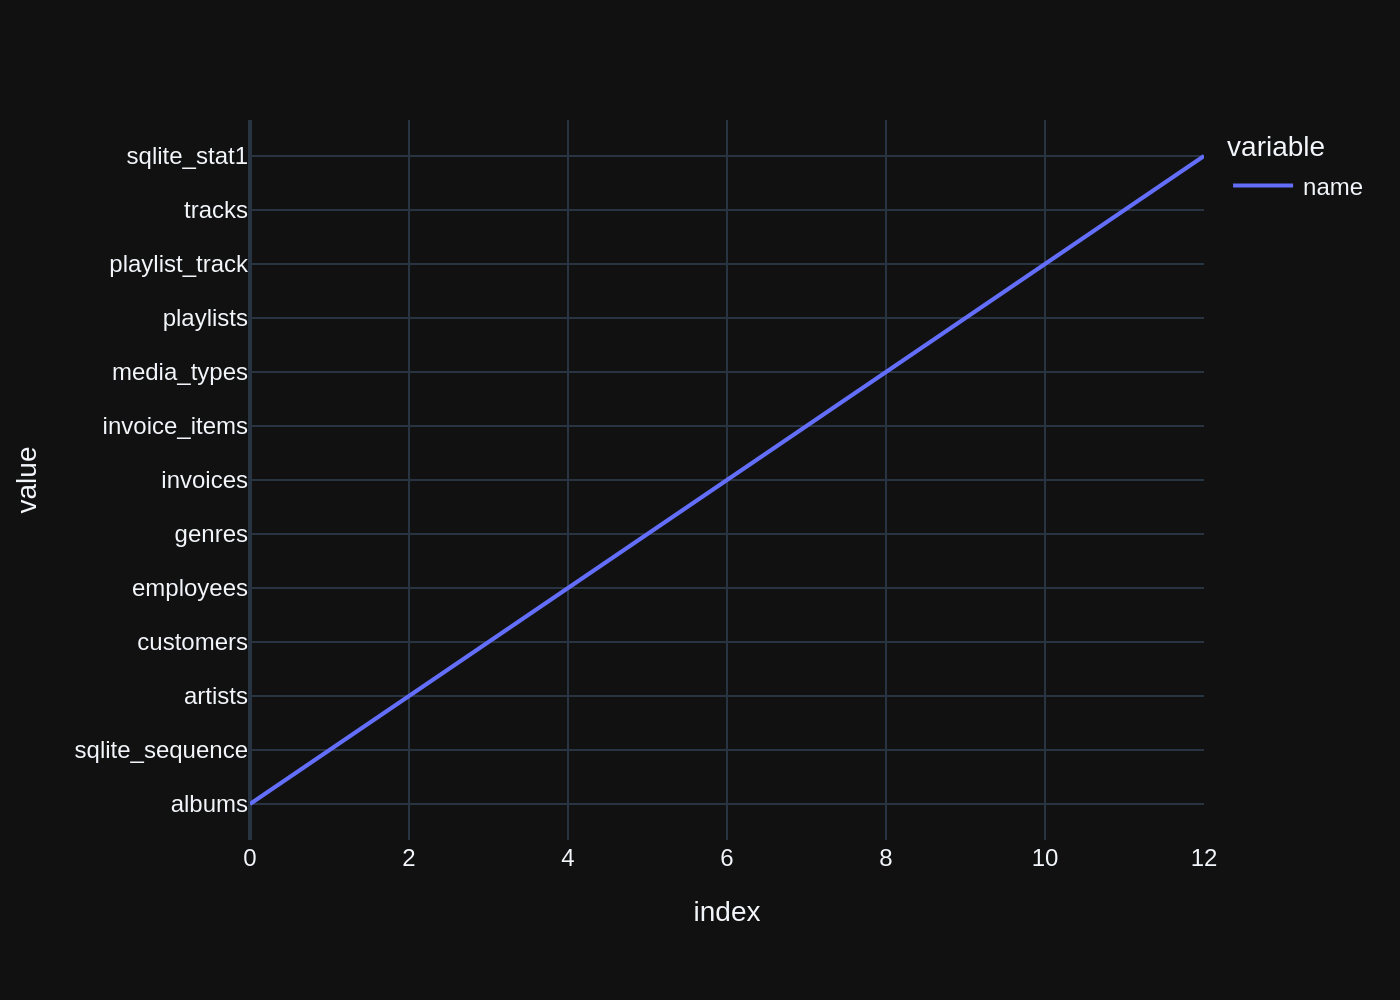

Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1
Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 3:  which table stores customer's orders


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "invoices"\r\n(\r\n    InvoiceId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    CustomerId INTEGER  NOT NULL,\r\n    InvoiceDate DATETIME  NOT NULL,\r\n    BillingAddress NVARCHAR(70),\r\n    BillingCity NVARCHAR(40),\r\n    BillingState NVARCHAR(40),\r\n    BillingCountry NVARCHAR(40),\r\n    BillingPostalCode NVARCHAR(10),\r\n    Total NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (CustomerId) REFERENCES "customers" (CustomerId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE TABLE "invoice_items"\r\n(\r\n    InvoiceLineId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    InvoiceId INTEGER  NOT NULL,\r\n    TrackId INTEGER  NOT NULL,\r\n 

Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1
Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



[( Ollama Response )]
{'model': 'granite-code:8b', 'created_at': '2024-10-13T15:47:43.53967117Z', 'message': {'role': 'assistant', 'content': 'The table that stores customer\'s orders is "invoices".\n'}, 'done_reason': 'stop', 'done': True, 'total_duration': 87645751586, 'load_duration': 4575793, 'prompt_eval_count': 1113, 'prompt_eval_duration': 84831461000, 'eval_count': 13, 'eval_duration': 2671150000}

[( LLM Response )]
The table that stores customer's orders is "invoices".


[( Output from LLM )]
The table that stores customer's orders is "invoices".

*** RETRY 1 ***

[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "invoices"\r\n(\r\n    InvoiceId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    CustomerId INTEGER  NOT NULL,\r\n    InvoiceDate DATETIME

Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1
Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



[( Ollama Response )]
{'model': 'granite-code:8b', 'created_at': '2024-10-13T15:48:57.67003844Z', 'message': {'role': 'assistant', 'content': 'Here is the corrected SQL query:\n\nSELECT * FROM invoices\n'}, 'done_reason': 'stop', 'done': True, 'total_duration': 74090044166, 'load_duration': 5271569, 'prompt_eval_count': 1081, 'prompt_eval_duration': 70482605000, 'eval_count': 16, 'eval_duration': 3423279000}

[( LLM Response )]
Here is the corrected SQL query:

SELECT * FROM invoices


[( Output from LLM )]
Here is the corrected SQL query:

SELECT * FROM invoices

*** RETRY 2 ***

[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "invoices"\r\n(\r\n    InvoiceId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    CustomerId INTEGER  NOT NULL,\r\n    InvoiceDate D

Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1
Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



[( Ollama Response )]
{'model': 'granite-code:8b', 'created_at': '2024-10-13T15:50:16.537990621Z', 'message': {'role': 'assistant', 'content': 'Here is the corrected SQL query:\n\nSELECT * FROM invoices\n'}, 'done_reason': 'stop', 'done': True, 'total_duration': 78825574854, 'load_duration': 4977404, 'prompt_eval_count': 1144, 'prompt_eval_duration': 75193252000, 'eval_count': 16, 'eval_duration': 3387150000}

[( LLM Response )]
Here is the corrected SQL query:

SELECT * FROM invoices


[( Output from LLM )]
Here is the corrected SQL query:

SELECT * FROM invoices


# QUESTION - 4:  How many customers are there


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "invoices"\r\n(\r\n    InvoiceId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    CustomerId INTEGE

SELECT COUNT(*) FROM customers


[( DATA )]
queried dataframe


,COUNT(*)
0,59



[( Ollama Parameters )]

      model=granite-code:8b ,
      options={} ,
      keep_alive=None
    

[( Ollama Prompt )]
[{"role": "system", "content": "The following is a pandas DataFrame that contains the results of the query that answers the question the user asked: 'How many customers are there'\n\nThe DataFrame was produced using this query: SELECT COUNT(*) FROM customers\n\n\nThe following is information about the resulting pandas DataFrame 'df': \nRunning df.dtypes gives:\n COUNT(*)    int64\ndtype: object"}, {"role": "user", "content": "Can you generate the Python plotly code to chart the results of the dataframe? Assume the data is in a pandas dataframe called 'df'. If there is only one value in the dataframe, use an Indicator. Respond with only Python code. Do not answer with any explanations -- just the code."}]

[( Ollama Response )]
{'model': 'granite-code:8b', 'created_at': '2024-10-13T15:51:50.143314487Z', 'message': {'role': 'assistant', 'content': 'import plotly.grap

import plotly.graph_objects as go

fig = go.Figure(data=[go.Indicator(
    mode="number+gauge",
    value=df.iloc[0, 0], # Replace with your column name and index if needed
    title={"text": "Number of Customers"},
    gauge={"axis": {"visible": False}, "bar": {"color": "darkslategray"}}
)])

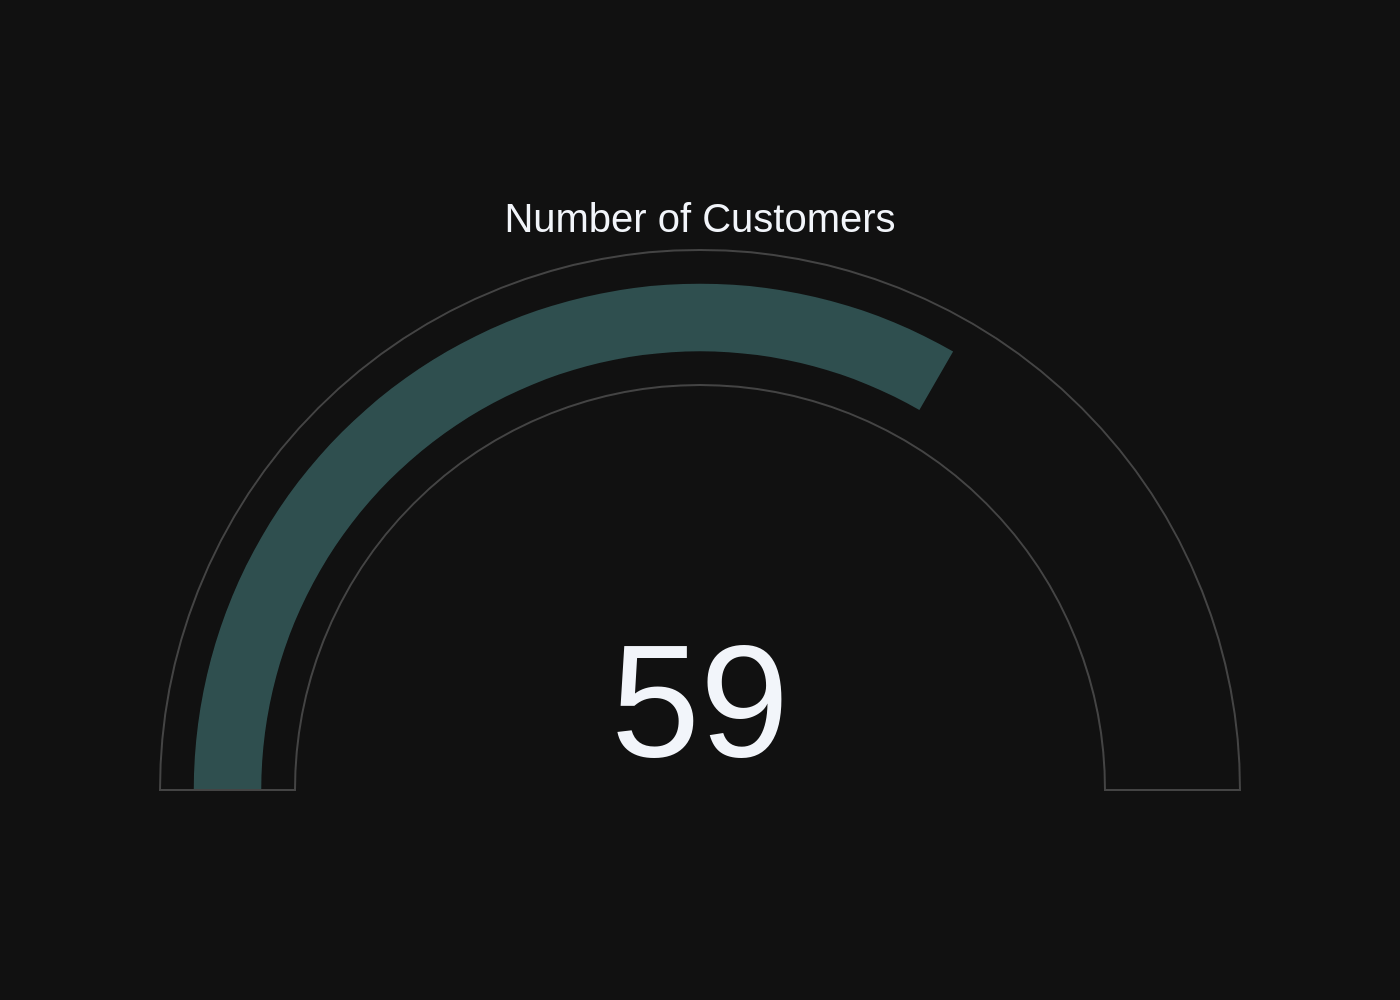

Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2
Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 5:  what are the top 5 countries that customers come from?


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "invoices"\r\n(\r\n    InvoiceId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    CustomerId INTEGER  NOT NULL,\r\n    InvoiceDate DATETIME  NOT NULL,\r\n    BillingAddress NVARCHAR(70),\r\n    BillingCity NVARCHAR(40),\r\n    BillingState NVARCHAR(40),\r\n    BillingCountry NVARCHAR(40),\r\n    BillingPostalCode NVARCHAR(10),\r\n    Total NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (CustomerId) REFERENCES "customers" (CustomerId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE TABLE "customers"\r\n(\r\n    CustomerId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    FirstName NVARCHAR(40)  NOT NULL,\r\n    LastName NVARCH

SELECT Country, COUNT(*) as NumberOfCustomers
FROM Customers
GROUP BY Country
ORDER BY NumberOfCustomers DESC
LIMIT 5


[( DATA )]
queried dataframe


,Country,NumberOfCustomers
0,USA,13
1,Canada,8
2,France,5
3,Brazil,5
4,Germany,4



[( Ollama Parameters )]

      model=granite-code:8b ,
      options={} ,
      keep_alive=None
    

[( Ollama Prompt )]
[{"role": "system", "content": "The following is a pandas DataFrame that contains the results of the query that answers the question the user asked: 'what are the top 5 countries that customers come from?'\n\nThe DataFrame was produced using this query: SELECT Country, COUNT(*) as NumberOfCustomers\nFROM Customers\nGROUP BY Country\nORDER BY NumberOfCustomers DESC\nLIMIT 5\n\nThe following is information about the resulting pandas DataFrame 'df': \nRunning df.dtypes gives:\n Country              object\nNumberOfCustomers     int64\ndtype: object"}, {"role": "user", "content": "Can you generate the Python plotly code to chart the results of the dataframe? Assume the data is in a pandas dataframe called 'df'. If there is only one value in the dataframe, use an Indicator. Respond with only Python code. Do not answer with any explanations -- just the code."}]

[( Ollam

import plotly.graph_objects as go

fig = go.Figure(data=[go.Indicator(
    mode="number+gauge",
    value=df["NumberOfCustomers"].iloc[0],
    number={"font": {"size": 40}},
    title={"text": "Top Customer Country"},
    domain={"x": [0, 1], "y": [0, 1]}
)])

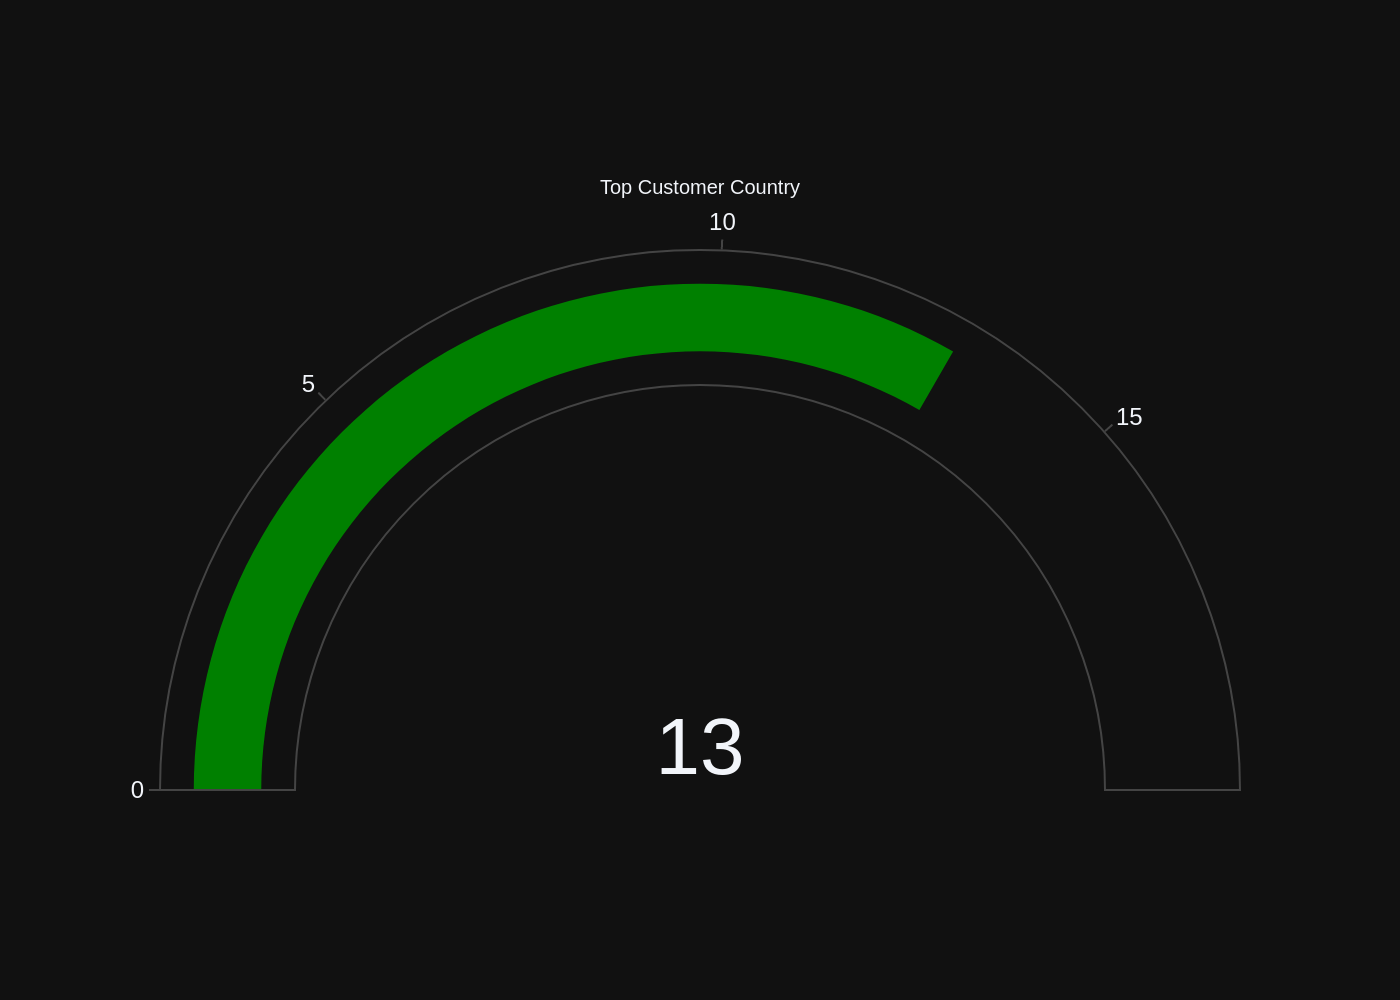

Number of requested results 10 is greater than number of elements in index 3, updating n_results = 3
Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 6:  List all albums and their corresponding artist names  


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE INDEX IFK_AlbumArtistId ON "albums" (ArtistId)\n\nCREATE TABLE "albums"\r\n(\r\n    AlbumId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Title NVARCHAR(160)  NOT NULL,\r\n    ArtistId INTEGER  NOT NULL,\r\n    FOREIGN KEY (ArtistId) REFERENCES "artists" (ArtistId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE TABLE "tracks"\r\n(\r\n    TrackId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Name NVARCHAR(200)  NOT NULL,\r\n    AlbumId INTEGER,\r\n    MediaTypeId INTEGER  NOT NULL,\r\n    GenreId INTEGER,\r\n    Composer NVARCHAR(220),\r\n    Milliseconds INTEGER  NOT NULL,\r\n    Bytes INTEGER,\r\n    UnitPrice NUMERIC(1

SELECT Album.Title, Artist.Name
FROM Albums as Album
JOIN Artists as Artist on Album.ArtistId = Artist.ArtistId


[( DATA )]
queried dataframe


,Title,Name
0,For Those About To Rock We Salute You,AC/DC
1,Balls to the Wall,Accept
2,Restless and Wild,Accept
3,Let There Be Rock,AC/DC
4,Big Ones,Aerosmith
...,...,...
342,Respighi:Pines of Rome,Eugene Ormandy
343,Schubert: The Late String Quartets & String Qu...,Emerson String Quartet
344,Monteverdi: L'Orfeo,"C. Monteverdi, Nigel Rogers - Chiaroscuro; Lon..."
345,Mozart: Chamber Music,Nash Ensemble



[( Ollama Parameters )]

      model=granite-code:8b ,
      options={} ,
      keep_alive=None
    

[( Ollama Prompt )]
[{"role": "system", "content": "The following is a pandas DataFrame that contains the results of the query that answers the question the user asked: 'List all albums and their corresponding artist names  '\n\nThe DataFrame was produced using this query: SELECT Album.Title, Artist.Name\nFROM Albums as Album\nJOIN Artists as Artist on Album.ArtistId = Artist.ArtistId\n\n\nThe following is information about the resulting pandas DataFrame 'df': \nRunning df.dtypes gives:\n Title    object\nName     object\ndtype: object"}, {"role": "user", "content": "Can you generate the Python plotly code to chart the results of the dataframe? Assume the data is in a pandas dataframe called 'df'. If there is only one value in the dataframe, use an Indicator. Respond with only Python code. Do not answer with any explanations -- just the code."}]

[( Ollama Response )]
{'model': 'grani

import plotly.express as px
fig = px.bar(df, x="Name", y="Title")

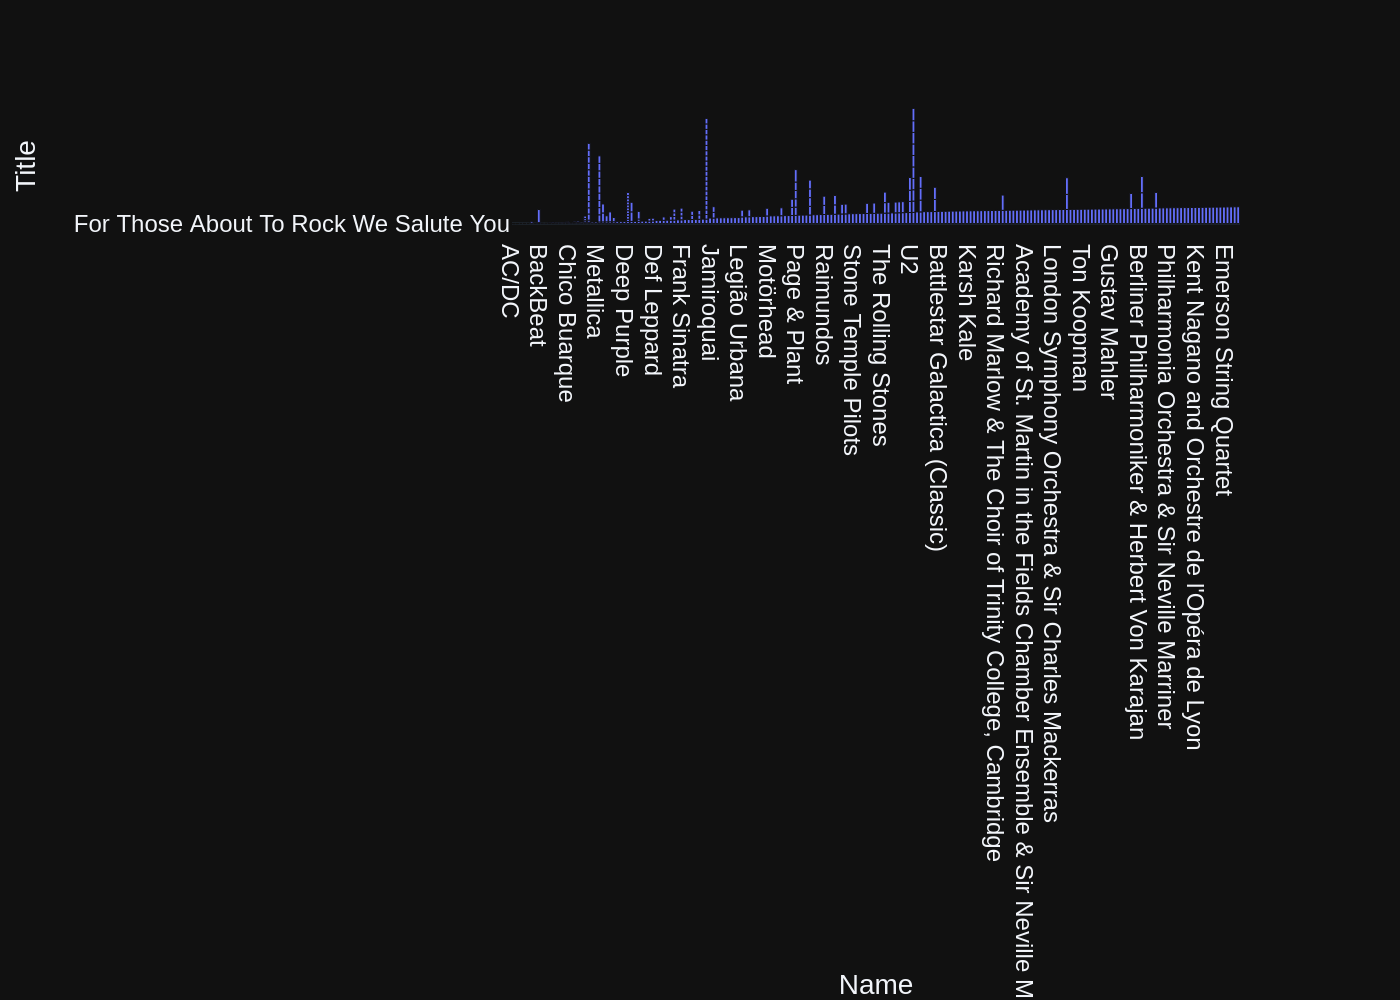

Number of requested results 10 is greater than number of elements in index 4, updating n_results = 4
Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 7:  Find all tracks with a name containing "What" (case-insensitive) 


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE INDEX IFK_TrackGenreId ON "tracks" (GenreId)\n\nCREATE INDEX IFK_PlaylistTrackTrackId ON "playlist_track" (TrackId)\n\nCREATE TABLE "tracks"\r\n(\r\n    TrackId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Name NVARCHAR(200)  NOT NULL,\r\n    AlbumId INTEGER,\r\n    MediaTypeId INTEGER  NOT NULL,\r\n    GenreId INTEGER,\r\n    Composer NVARCHAR(220),\r\n    Milliseconds INTEGER  NOT NULL,\r\n    Bytes INTEGER,\r\n    UnitPrice NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (AlbumId) REFERENCES "albums" (AlbumId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (GenreId) REFERENCES "genres" (GenreId) \r\n\t\tON DEL

SELECT Name
FROM Tracks
WHERE Name LIKE '%what%' OR Name LIKE '%What%'


[( DATA )]
queried dataframe


,Name
0,What It Takes
1,What You Are
2,Do what cha wanna
3,What is and Should Never Be
4,So What
5,What A Day
6,What If I Do?
7,What Now My Love
8,Whatsername
9,"Whatever It Is, I Just Can't Stop"



[( Ollama Parameters )]

      model=granite-code:8b ,
      options={} ,
      keep_alive=None
    

[( Ollama Prompt )]
[{"role": "system", "content": "The following is a pandas DataFrame that contains the results of the query that answers the question the user asked: 'Find all tracks with a name containing \"What\" (case-insensitive) '\n\nThe DataFrame was produced using this query: SELECT Name\nFROM Tracks\nWHERE Name LIKE '%what%' OR Name LIKE '%What%'\n\n\n\n\nThe following is information about the resulting pandas DataFrame 'df': \nRunning df.dtypes gives:\n Name    object\ndtype: object"}, {"role": "user", "content": "Can you generate the Python plotly code to chart the results of the dataframe? Assume the data is in a pandas dataframe called 'df'. If there is only one value in the dataframe, use an Indicator. Respond with only Python code. Do not answer with any explanations -- just the code."}]

[( Ollama Response )]
{'model': 'granite-code:8b', 'created_at': '2024-10-13T15:

import plotly.graph_objects as go

fig = go.Figure(data=[go.Indicator(
    mode="number+gauge",
    value=df["Name"].iloc[0], # replace with first value in dataframe
    title="Result Count")])

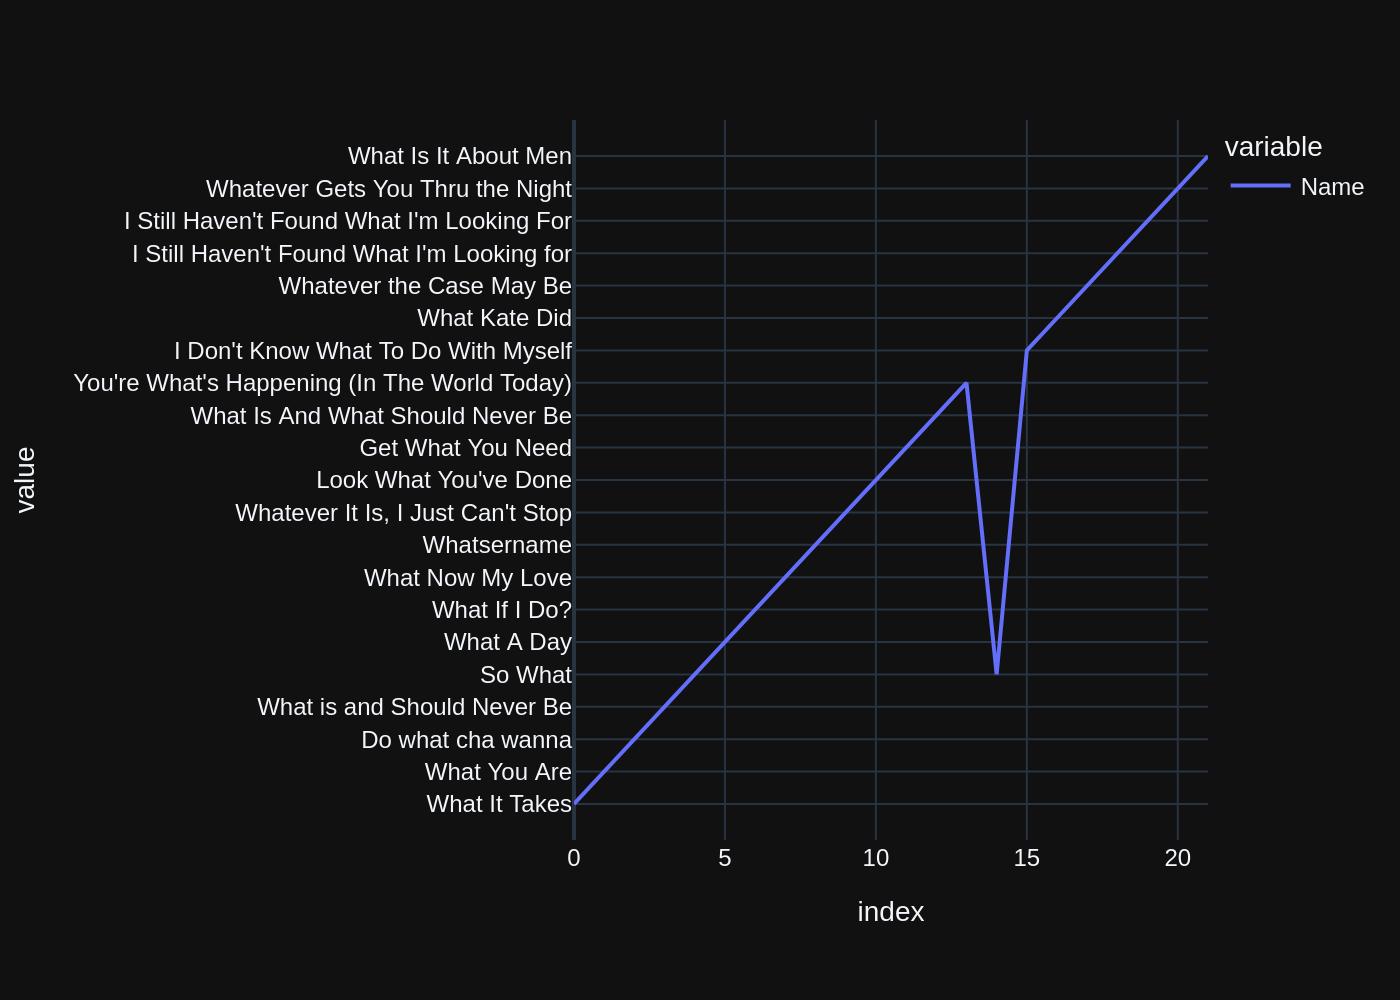

Number of requested results 10 is greater than number of elements in index 5, updating n_results = 5
Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 8:  Get the total number of invoices for each customer


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "invoices"\r\n(\r\n    InvoiceId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    CustomerId INTEGER  NOT NULL,\r\n    InvoiceDate DATETIME  NOT NULL,\r\n    BillingAddress NVARCHAR(70),\r\n    BillingCity NVARCHAR(40),\r\n    BillingState NVARCHAR(40),\r\n    BillingCountry NVARCHAR(40),\r\n    BillingPostalCode NVARCHAR(10),\r\n    Total NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (CustomerId) REFERENCES "customers" (CustomerId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE INDEX IFK_InvoiceCustomerId ON "invoices" (CustomerId)\n\nCREATE INDEX IFK_InvoiceLineInvoiceId ON "invoice_items" (InvoiceId)\n\nCREATE TABLE "invoice_

SELECT CustomerId, COUNT(*) as NumberOfInvoices
FROM Invoices
GROUP BY CustomerId


[( DATA )]
queried dataframe


,CustomerId,NumberOfInvoices
0,1,7
1,2,7
2,3,7
3,4,7
4,5,7
5,6,7
6,7,7
7,8,7
8,9,7
9,10,7



[( Ollama Parameters )]

      model=granite-code:8b ,
      options={} ,
      keep_alive=None
    

[( Ollama Prompt )]
[{"role": "system", "content": "The following is a pandas DataFrame that contains the results of the query that answers the question the user asked: 'Get the total number of invoices for each customer'\n\nThe DataFrame was produced using this query: SELECT CustomerId, COUNT(*) as NumberOfInvoices\nFROM Invoices\nGROUP BY CustomerId\n\n\n\n\nThe following is information about the resulting pandas DataFrame 'df': \nRunning df.dtypes gives:\n CustomerId          int64\nNumberOfInvoices    int64\ndtype: object"}, {"role": "user", "content": "Can you generate the Python plotly code to chart the results of the dataframe? Assume the data is in a pandas dataframe called 'df'. If there is only one value in the dataframe, use an Indicator. Respond with only Python code. Do not answer with any explanations -- just the code."}]

[( Ollama Response )]
{'model': 'granite-code:8b

import plotly.express as px

fig = px.bar(df, x="Customer Id", y="Number of Invoices")

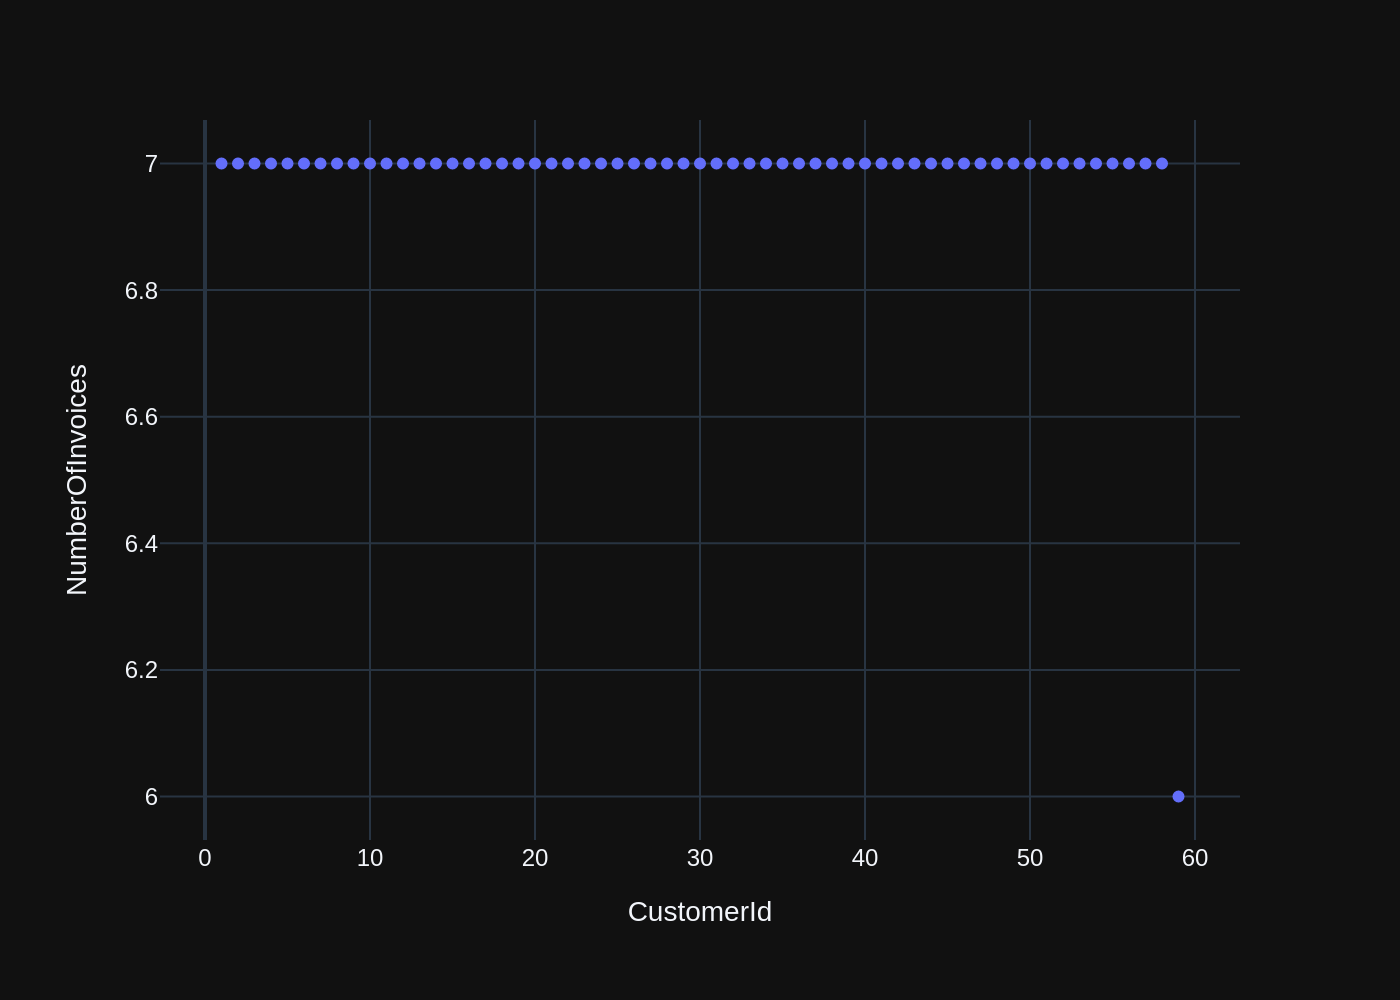

Number of requested results 10 is greater than number of elements in index 6, updating n_results = 6
Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 9:  Find the total number of invoices per country


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "invoices"\r\n(\r\n    InvoiceId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    CustomerId INTEGER  NOT NULL,\r\n    InvoiceDate DATETIME  NOT NULL,\r\n    BillingAddress NVARCHAR(70),\r\n    BillingCity NVARCHAR(40),\r\n    BillingState NVARCHAR(40),\r\n    BillingCountry NVARCHAR(40),\r\n    BillingPostalCode NVARCHAR(10),\r\n    Total NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (CustomerId) REFERENCES "customers" (CustomerId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE INDEX IFK_InvoiceCustomerId ON "invoices" (CustomerId)\n\nCREATE TABLE "invoice_items"\r\n(\r\n    InvoiceLineId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\

SELECT Country, COUNT(*) as NumberOfInvoices
FROM Invoices
GROUP BY Country

Number of requested results 10 is greater than number of elements in index 6, updating n_results = 6
Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2


*** RETRY 1 ***

[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "invoices"\r\n(\r\n    InvoiceId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    CustomerId INTEGER  NOT NULL,\r\n    InvoiceDate DATETIME  NOT NULL,\r\n    BillingAddress NVARCHAR(70),\r\n    BillingCity NVARCHAR(40),\r\n    BillingState NVARCHAR(40),\r\n    BillingCountry NVARCHAR(40),\r\n    BillingPostalCode NVARCHAR(10),\r\n    Total NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (CustomerId) REFERENCES "customers" (CustomerId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE TABLE "invoice_items"\r\n(\r\n    InvoiceLineId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    InvoiceId INTEGER  NOT NULL,\r\n    TrackId INTEGER  NOT NULL,\r\n    UnitPrice NUMERIC(10,2)  NOT NULL,\r\

SELECT Country, COUNT(*) as NumberOfInvoices
FROM Invoices
GROUP BY Country
 results in the following exception

Number of requested results 10 is greater than number of elements in index 6, updating n_results = 6
Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2


*** RETRY 2 ***

[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "invoices"\r\n(\r\n    InvoiceId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    CustomerId INTEGER  NOT NULL,\r\n    InvoiceDate DATETIME  NOT NULL,\r\n    BillingAddress NVARCHAR(70),\r\n    BillingCity NVARCHAR(40),\r\n    BillingState NVARCHAR(40),\r\n    BillingCountry NVARCHAR(40),\r\n    BillingPostalCode NVARCHAR(10),\r\n    Total NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (CustomerId) REFERENCES "customers" (CustomerId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE TABLE "invoice_items"\r\n(\r\n    InvoiceLineId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    InvoiceId INTEGER  NOT NULL,\r\n    TrackId INTEGER  NOT NULL,\r\n    UnitPrice NUMERIC(10,2)  NOT NULL,\r\

SELECT Country, COUNT(*) as NumberOfInvoices
FROM Invoices
GROUP BY Country

Number of requested results 10 is greater than number of elements in index 6, updating n_results = 6
Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 10:  List all invoices with a total exceeding $10


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "invoice_items"\r\n(\r\n    InvoiceLineId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    InvoiceId INTEGER  NOT NULL,\r\n    TrackId INTEGER  NOT NULL,\r\n    UnitPrice NUMERIC(10,2)  NOT NULL,\r\n    Quantity INTEGER  NOT NULL,\r\n    FOREIGN KEY (InvoiceId) REFERENCES "invoices" (InvoiceId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (TrackId) REFERENCES "tracks" (TrackId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE INDEX IFK_InvoiceLineInvoiceId ON "invoice_items" (InvoiceId)\n\nCREATE TABLE "invoices"\r\n(\r\n    InvoiceId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    CustomerId INTEGER  NOT NU

SELECT *
FROM Invoices
WHERE Total > 10


[( DATA )]
queried dataframe


,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,5,23,2009-01-11 00:00:00,69 Salem Street,Boston,MA,USA,2113,13.86
1,12,2,2009-02-11 00:00:00,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,13.86
2,19,40,2009-03-14 00:00:00,"8, Rue Hanovre",Paris,None,France,75002,13.86
3,26,19,2009-04-14 00:00:00,1 Infinite Loop,Cupertino,CA,USA,95014,13.86
4,33,57,2009-05-15 00:00:00,"Calle Lira, 198",Santiago,None,Chile,None,13.86
...,...,...,...,...,...,...,...,...,...
59,383,10,2013-08-12 00:00:00,"Rua Dr. Falcão Filho, 155",São Paulo,SP,Brazil,01007-010,13.86
60,390,48,2013-09-12 00:00:00,Lijnbaansgracht 120bg,Amsterdam,VV,Netherlands,1016,13.86
61,397,27,2013-10-13 00:00:00,1033 N Park Ave,Tucson,AZ,USA,85719,13.86
62,404,6,2013-11-13 00:00:00,Rilská 3174/6,Prague,None,Czech Republic,14300,25.86



[( Ollama Parameters )]

      model=granite-code:8b ,
      options={} ,
      keep_alive=None
    

[( Ollama Prompt )]
[{"role": "system", "content": "The following is a pandas DataFrame that contains the results of the query that answers the question the user asked: 'List all invoices with a total exceeding $10'\n\nThe DataFrame was produced using this query: SELECT *\nFROM Invoices\nWHERE Total > 10\n\n\n\n\nThe following is information about the resulting pandas DataFrame 'df': \nRunning df.dtypes gives:\n InvoiceId              int64\nCustomerId             int64\nInvoiceDate           object\nBillingAddress        object\nBillingCity           object\nBillingState          object\nBillingCountry        object\nBillingPostalCode     object\nTotal                float64\ndtype: object"}, {"role": "user", "content": "Can you generate the Python plotly code to chart the results of the dataframe? Assume the data is in a pandas dataframe called 'df'. If there is only one value in th

import plotly.express as px

fig = px.bar(df, x="InvoiceId", y="Total")

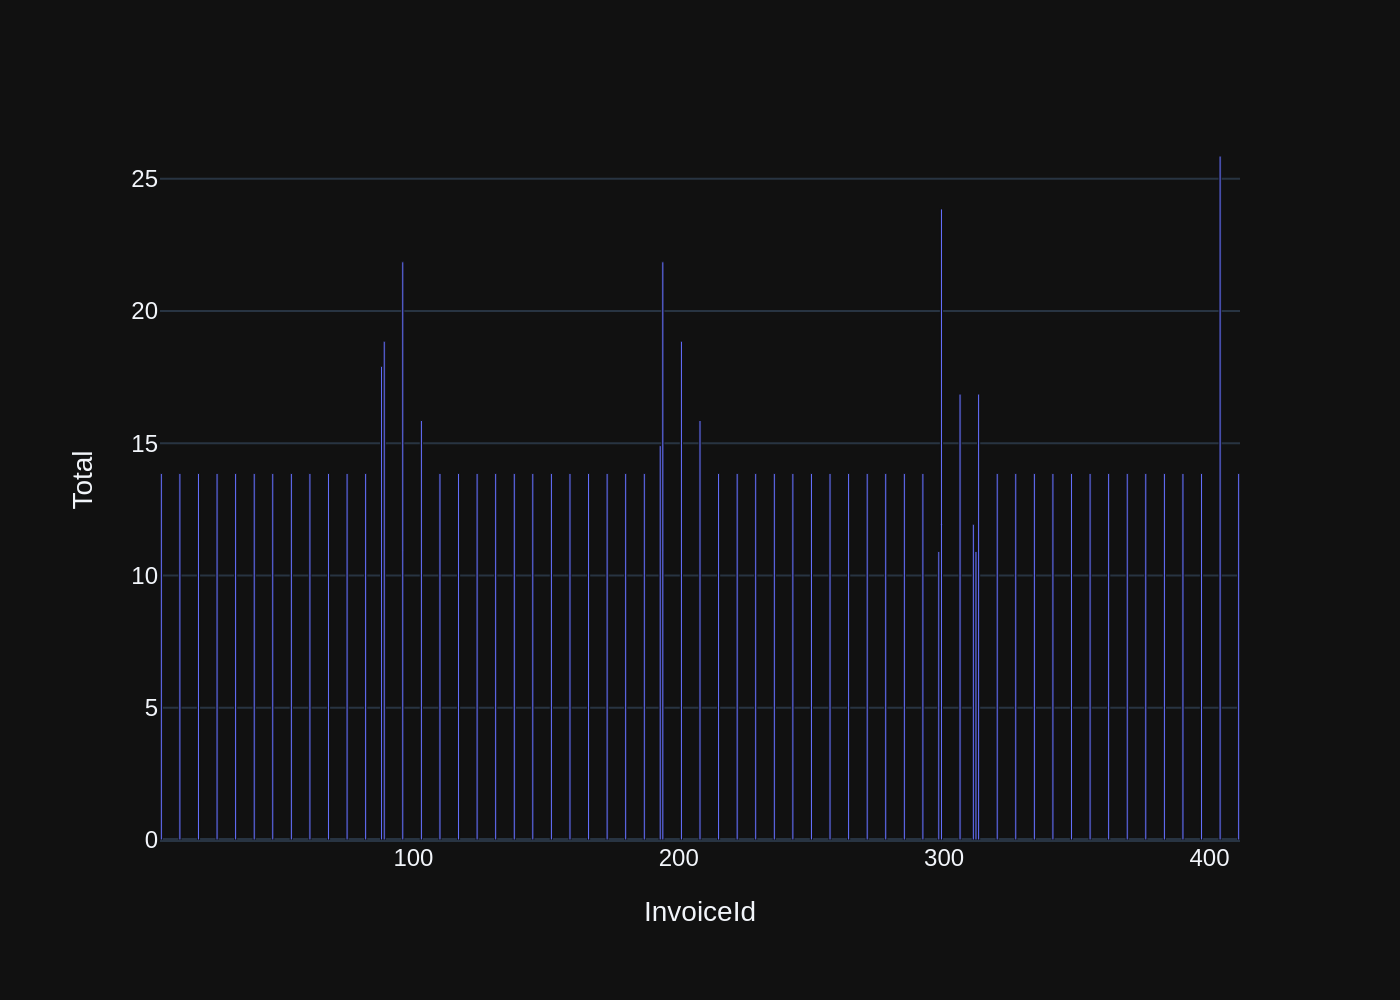

Number of requested results 10 is greater than number of elements in index 7, updating n_results = 7
Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 11:  Find all invoices since 2010 and the total amount invoiced:


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "invoices"\r\n(\r\n    InvoiceId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    CustomerId INTEGER  NOT NULL,\r\n    InvoiceDate DATETIME  NOT NULL,\r\n    BillingAddress NVARCHAR(70),\r\n    BillingCity NVARCHAR(40),\r\n    BillingState NVARCHAR(40),\r\n    BillingCountry NVARCHAR(40),\r\n    BillingPostalCode NVARCHAR(10),\r\n    Total NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (CustomerId) REFERENCES "customers" (CustomerId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE TABLE "invoice_items"\r\n(\r\n    InvoiceLineId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    InvoiceId INTEGER  NOT NULL,\r\n    TrackId

SELECT *
FROM Invoices
WHERE InvoiceDate >= '2010-01-01'
ORDER BY Total DESC


[( DATA )]
queried dataframe


,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,404,6,2013-11-13 00:00:00,Rilská 3174/6,Prague,None,Czech Republic,14300,25.86
1,299,26,2012-08-05 00:00:00,2211 W Berry Street,Fort Worth,TX,USA,76110,23.86
2,96,45,2010-02-18 00:00:00,Erzsébet krt. 58.,Budapest,None,Hungary,H-1073,21.86
3,194,46,2011-04-28 00:00:00,3 Chatham Street,Dublin,Dublin,Ireland,None,21.86
4,89,7,2010-01-18 00:00:00,"Rotenturmstraße 4, 1010 Innere Stadt",Vienne,None,Austria,1010,18.86
...,...,...,...,...,...,...,...,...,...
324,377,45,2013-07-20 00:00:00,Erzsébet krt. 58.,Budapest,None,Hungary,H-1073,0.99
325,384,24,2013-08-20 00:00:00,162 E Superior Street,Chicago,IL,USA,60611,0.99
326,391,3,2013-09-20 00:00:00,1498 rue Bélanger,Montréal,QC,Canada,H2G 1A7,0.99
327,398,41,2013-10-21 00:00:00,"11, Place Bellecour",Lyon,None,France,69002,0.99



[( Ollama Parameters )]

      model=granite-code:8b ,
      options={} ,
      keep_alive=None
    

[( Ollama Prompt )]
[{"role": "system", "content": "The following is a pandas DataFrame that contains the results of the query that answers the question the user asked: 'Find all invoices since 2010 and the total amount invoiced:'\n\nThe DataFrame was produced using this query: SELECT *\nFROM Invoices\nWHERE InvoiceDate >= '2010-01-01'\nORDER BY Total DESC\n\n\n\n\nThe following is information about the resulting pandas DataFrame 'df': \nRunning df.dtypes gives:\n InvoiceId              int64\nCustomerId             int64\nInvoiceDate           object\nBillingAddress        object\nBillingCity           object\nBillingState          object\nBillingCountry        object\nBillingPostalCode     object\nTotal                float64\ndtype: object"}, {"role": "user", "content": "Can you generate the Python plotly code to chart the results of the dataframe? Assume the data is in a pandas da

Here is the Python plotly code to chart the results of the DataFrame:

import plotly.express as px

fig = px.bar(df, x="InvoiceDate", y="Total")



This code will create a bar chart with the 'InvoiceDate' on the x-axis and the 'Total' on the y-axis. Each bar in the chart represents a unique invoice date and the height of the bar represents the total amount invoiced for that date. The chart provides a visual representation of the total amount invoiced over time, allowing users to easily identify trends and patterns in the data.

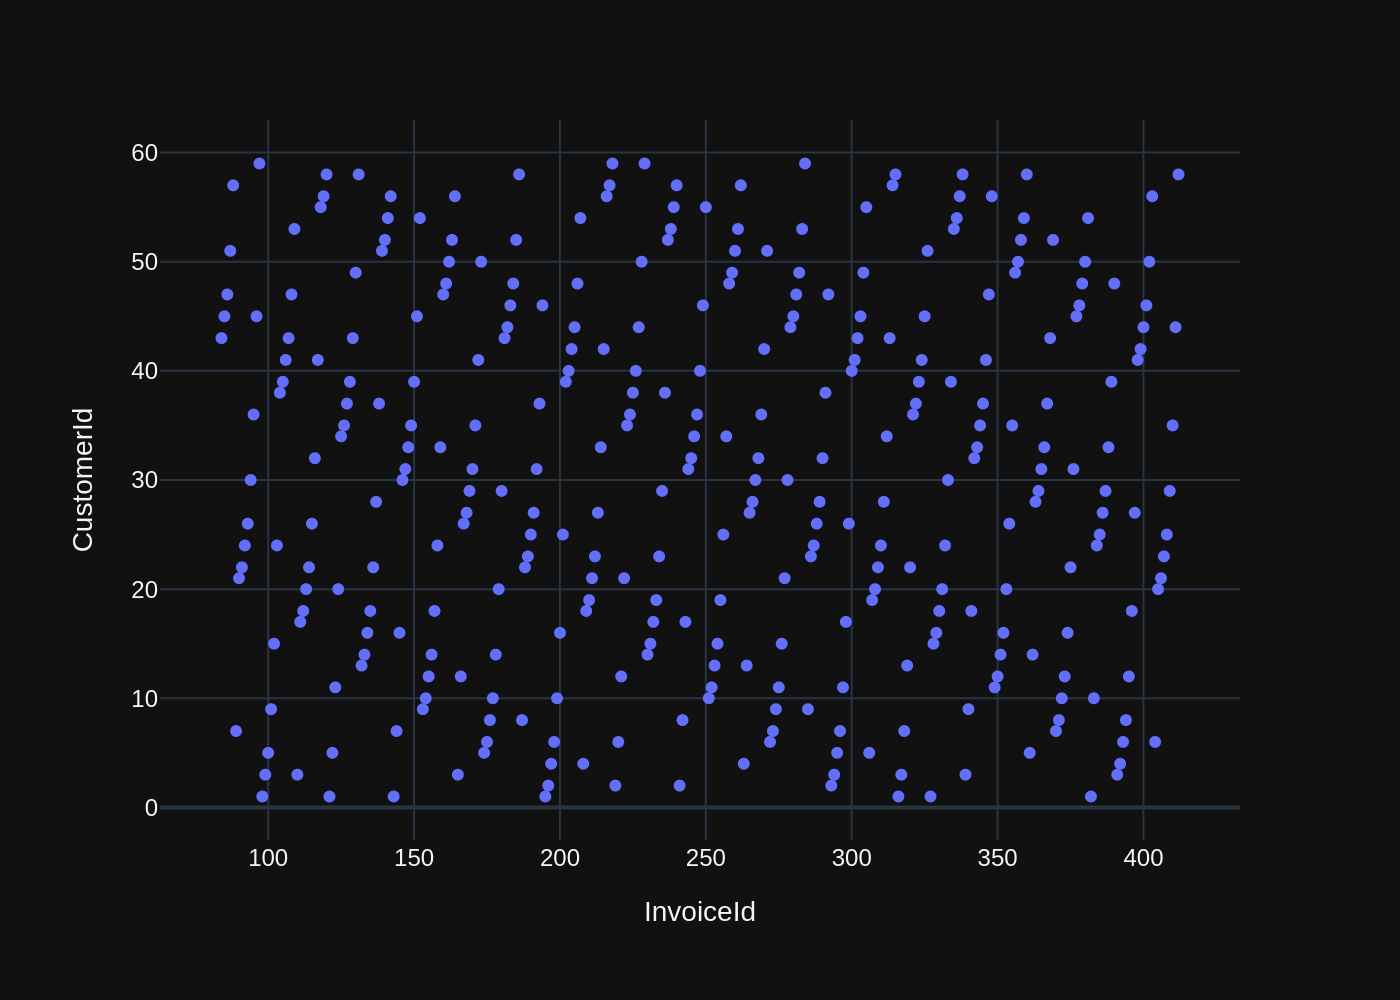

Number of requested results 10 is greater than number of elements in index 8, updating n_results = 8
Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 12:  List all employees and their reporting manager's name (if any):


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE INDEX IFK_EmployeeReportsTo ON "employees" (ReportsTo)\n\nCREATE TABLE "employees"\r\n(\r\n    EmployeeId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    LastName NVARCHAR(20)  NOT NULL,\r\n    FirstName NVARCHAR(20)  NOT NULL,\r\n    Title NVARCHAR(30),\r\n    ReportsTo INTEGER,\r\n    BirthDate DATETIME,\r\n    HireDate DATETIME,\r\n    Address NVARCHAR(70),\r\n    City NVARCHAR(40),\r\n    State NVARCHAR(40),\r\n    Country NVARCHAR(40),\r\n    PostalCode NVARCHAR(10),\r\n    Phone NVARCHAR(24),\r\n    Fax NVARCHAR(24),\r\n    Email NVARCHAR(60),\r\n    FOREIGN KEY (ReportsTo) REFERENCES "employees" (EmployeeId) \r\n\t\tON DELETE 

SELECT Employee.LastName, Employee.FirstName, IFNULL(Manager.LastName,'') as ManagerLastName, IFNULL(Manager.FirstName,'') as ManagerFirstName
FROM Employees AS Employee
LEFT JOIN Employees AS Manager ON Employee.ReportsTo = Manager.EmployeeId


[( DATA )]
queried dataframe


,LastName,FirstName,ManagerLastName,ManagerFirstName
0,Adams,Andrew,,
1,Edwards,Nancy,Adams,Andrew
2,Peacock,Jane,Edwards,Nancy
3,Park,Margaret,Edwards,Nancy
4,Johnson,Steve,Edwards,Nancy
5,Mitchell,Michael,Adams,Andrew
6,King,Robert,Mitchell,Michael
7,Callahan,Laura,Mitchell,Michael



[( Ollama Parameters )]

      model=granite-code:8b ,
      options={} ,
      keep_alive=None
    

[( Ollama Prompt )]
[{"role": "system", "content": "The following is a pandas DataFrame that contains the results of the query that answers the question the user asked: 'List all employees and their reporting manager's name (if any):'\n\nThe DataFrame was produced using this query: SELECT Employee.LastName, Employee.FirstName, IFNULL(Manager.LastName,'') as ManagerLastName, IFNULL(Manager.FirstName,'') as ManagerFirstName\nFROM Employees AS Employee\nLEFT JOIN Employees AS Manager ON Employee.ReportsTo = Manager.EmployeeId\n\n\nThe following is information about the resulting pandas DataFrame 'df': \nRunning df.dtypes gives:\n LastName            object\nFirstName           object\nManagerLastName     object\nManagerFirstName    object\ndtype: object"}, {"role": "user", "content": "Can you generate the Python plotly code to chart the results of the dataframe? Assume the data is in a p

import plotly.express as px

fig = px.bar(df, x="ManagerLastName", y="FirstName")

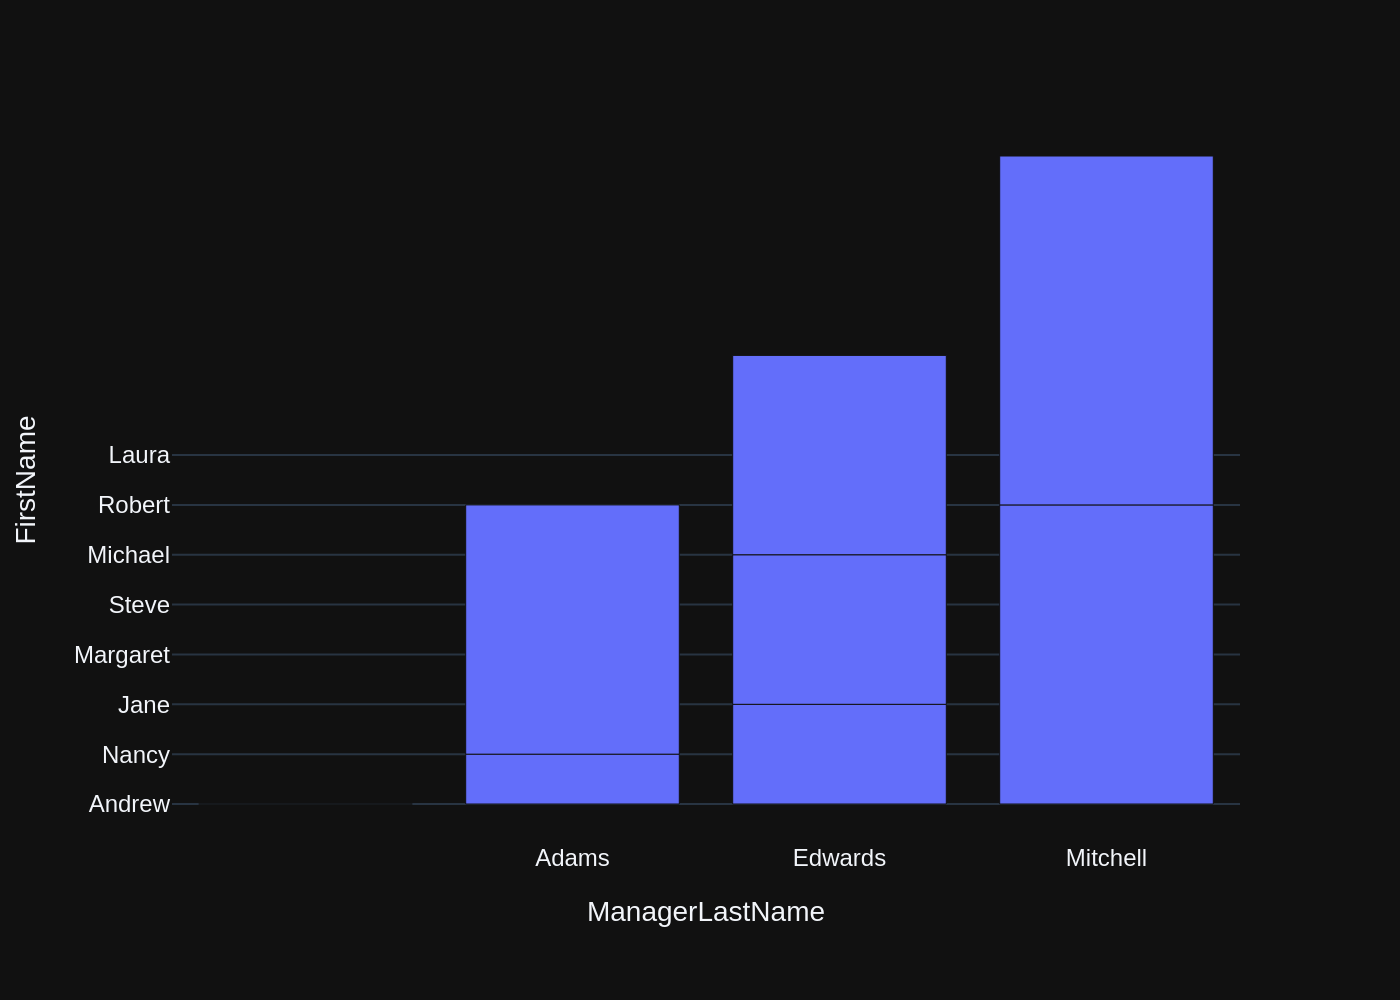

Number of requested results 10 is greater than number of elements in index 9, updating n_results = 9
Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 13:   Get the average invoice total for each customer:


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "invoices"\r\n(\r\n    InvoiceId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    CustomerId INTEGER  NOT NULL,\r\n    InvoiceDate DATETIME  NOT NULL,\r\n    BillingAddress NVARCHAR(70),\r\n    BillingCity NVARCHAR(40),\r\n    BillingState NVARCHAR(40),\r\n    BillingCountry NVARCHAR(40),\r\n    BillingPostalCode NVARCHAR(10),\r\n    Total NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (CustomerId) REFERENCES "customers" (CustomerId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE INDEX IFK_InvoiceCustomerId ON "invoices" (CustomerId)\n\nCREATE INDEX IFK_InvoiceLineInvoiceId ON "invoice_items" (InvoiceId)\n\nCREATE TABLE "invoice_

SELECT CustomerId, AVG(Total) as AverageInvoiceTotal
FROM Invoices
GROUP BY CustomerId


[( DATA )]
queried dataframe


,CustomerId,AverageInvoiceTotal
0,1,5.660000
1,2,5.374286
2,3,5.660000
3,4,5.660000
4,5,5.802857
5,6,7.088571
6,7,6.088571
7,8,5.374286
8,9,5.374286
9,10,5.374286



[( Ollama Parameters )]

      model=granite-code:8b ,
      options={} ,
      keep_alive=None
    

[( Ollama Prompt )]
[{"role": "system", "content": "The following is a pandas DataFrame that contains the results of the query that answers the question the user asked: ' Get the average invoice total for each customer:'\n\nThe DataFrame was produced using this query: SELECT CustomerId, AVG(Total) as AverageInvoiceTotal\nFROM Invoices\nGROUP BY CustomerId\n\n\n\n\nThe following is information about the resulting pandas DataFrame 'df': \nRunning df.dtypes gives:\n CustomerId               int64\nAverageInvoiceTotal    float64\ndtype: object"}, {"role": "user", "content": "Can you generate the Python plotly code to chart the results of the dataframe? Assume the data is in a pandas dataframe called 'df'. If there is only one value in the dataframe, use an Indicator. Respond with only Python code. Do not answer with any explanations -- just the code."}]

[( Ollama Response )]
{'model': 'g

import plotly.express as px

fig = px.bar(df, x="CustomerId", y="AverageInvoiceTotal")

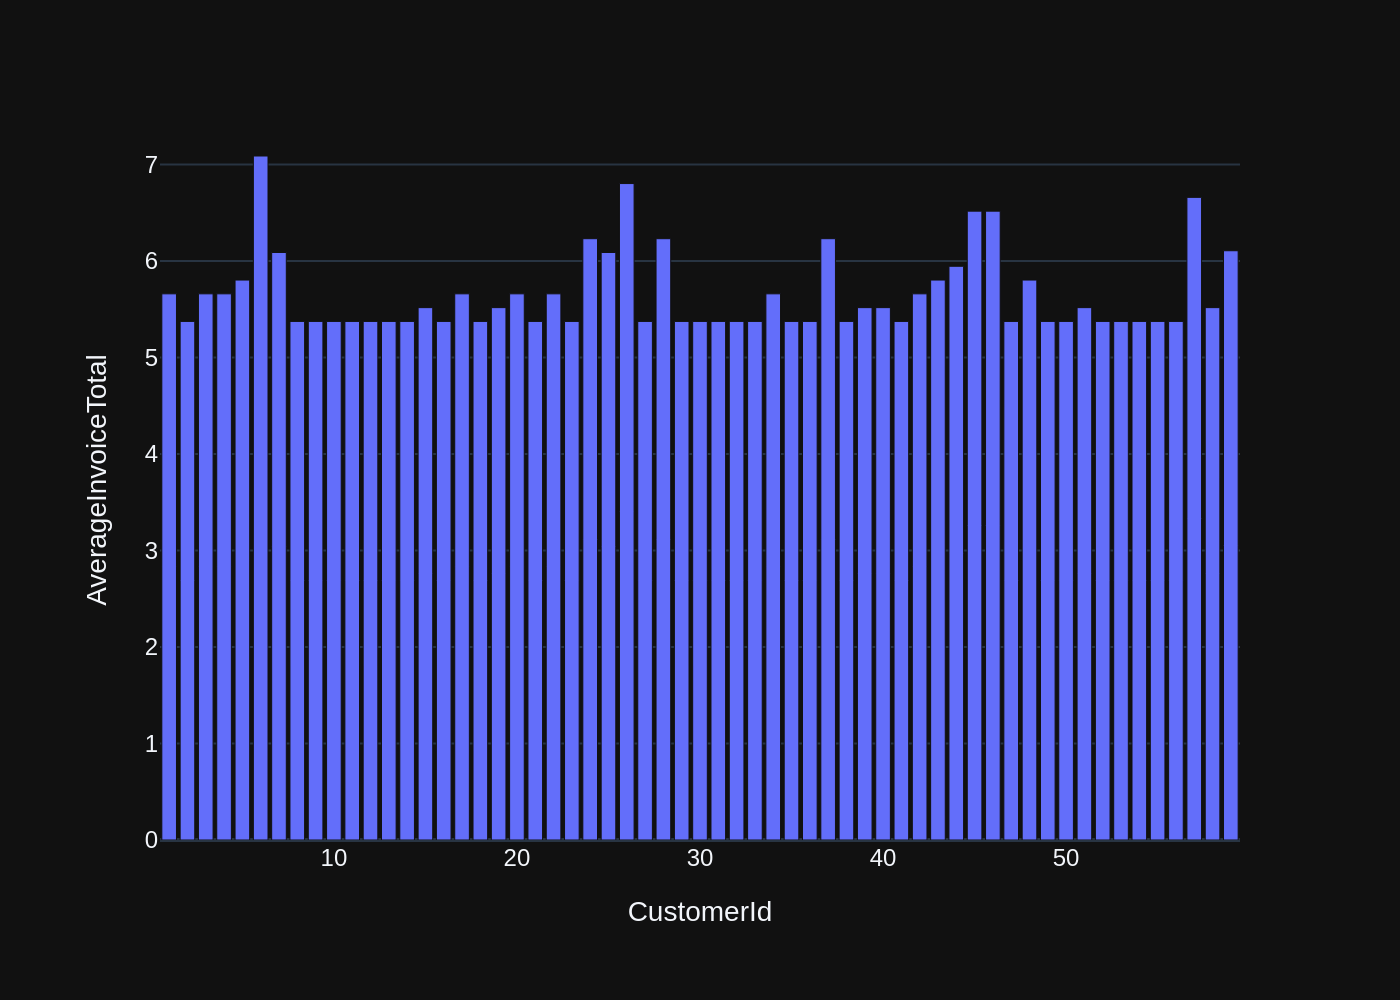

Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 14:  Find the top 5 most expensive tracks (based on unit price):


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "tracks"\r\n(\r\n    TrackId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Name NVARCHAR(200)  NOT NULL,\r\n    AlbumId INTEGER,\r\n    MediaTypeId INTEGER  NOT NULL,\r\n    GenreId INTEGER,\r\n    Composer NVARCHAR(220),\r\n    Milliseconds INTEGER  NOT NULL,\r\n    Bytes INTEGER,\r\n    UnitPrice NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (AlbumId) REFERENCES "albums" (AlbumId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (GenreId) REFERENCES "genres" (GenreId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (MediaTypeId) REFERENCES "media_types" (MediaTypeId) \r\n\t\tON DELETE NO ACT

SELECT * FROM Tracks
ORDER BY UnitPrice DESC
LIMIT 5


[( DATA )]
queried dataframe


,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,2819,Battlestar Galactica: The Story So Far,226,3,18,None,2622250,490750393,1.99
1,2820,Occupation / Precipice,227,3,19,None,5286953,1054423946,1.99
2,2821,"Exodus, Pt. 1",227,3,19,None,2621708,475079441,1.99
3,2822,"Exodus, Pt. 2",227,3,19,None,2618000,466820021,1.99
4,2823,Collaborators,227,3,19,None,2626626,483484911,1.99



[( Ollama Parameters )]

      model=granite-code:8b ,
      options={} ,
      keep_alive=None
    

[( Ollama Prompt )]
[{"role": "system", "content": "The following is a pandas DataFrame that contains the results of the query that answers the question the user asked: 'Find the top 5 most expensive tracks (based on unit price):'\n\nThe DataFrame was produced using this query: SELECT * FROM Tracks\nORDER BY UnitPrice DESC\nLIMIT 5\n\n\n\n\n\n\nThe following is information about the resulting pandas DataFrame 'df': \nRunning df.dtypes gives:\n TrackId           int64\nName             object\nAlbumId           int64\nMediaTypeId       int64\nGenreId           int64\nComposer         object\nMilliseconds      int64\nBytes             int64\nUnitPrice       float64\ndtype: object"}, {"role": "user", "content": "Can you generate the Python plotly code to chart the results of the dataframe? Assume the data is in a pandas dataframe called 'df'. If there is only one value in the dataframe, 

import plotly.graph_objects as go

fig = go.Figure(data=[go.Indicator(
    mode="number+gauge",
    number=df['UnitPrice'].max(),
    title={'text': "Most Expensive Track"},
    delta={"reference": df['UnitPrice'].mean()},
    domain={"x": [0, 1], "y": [0, 1]}
)])

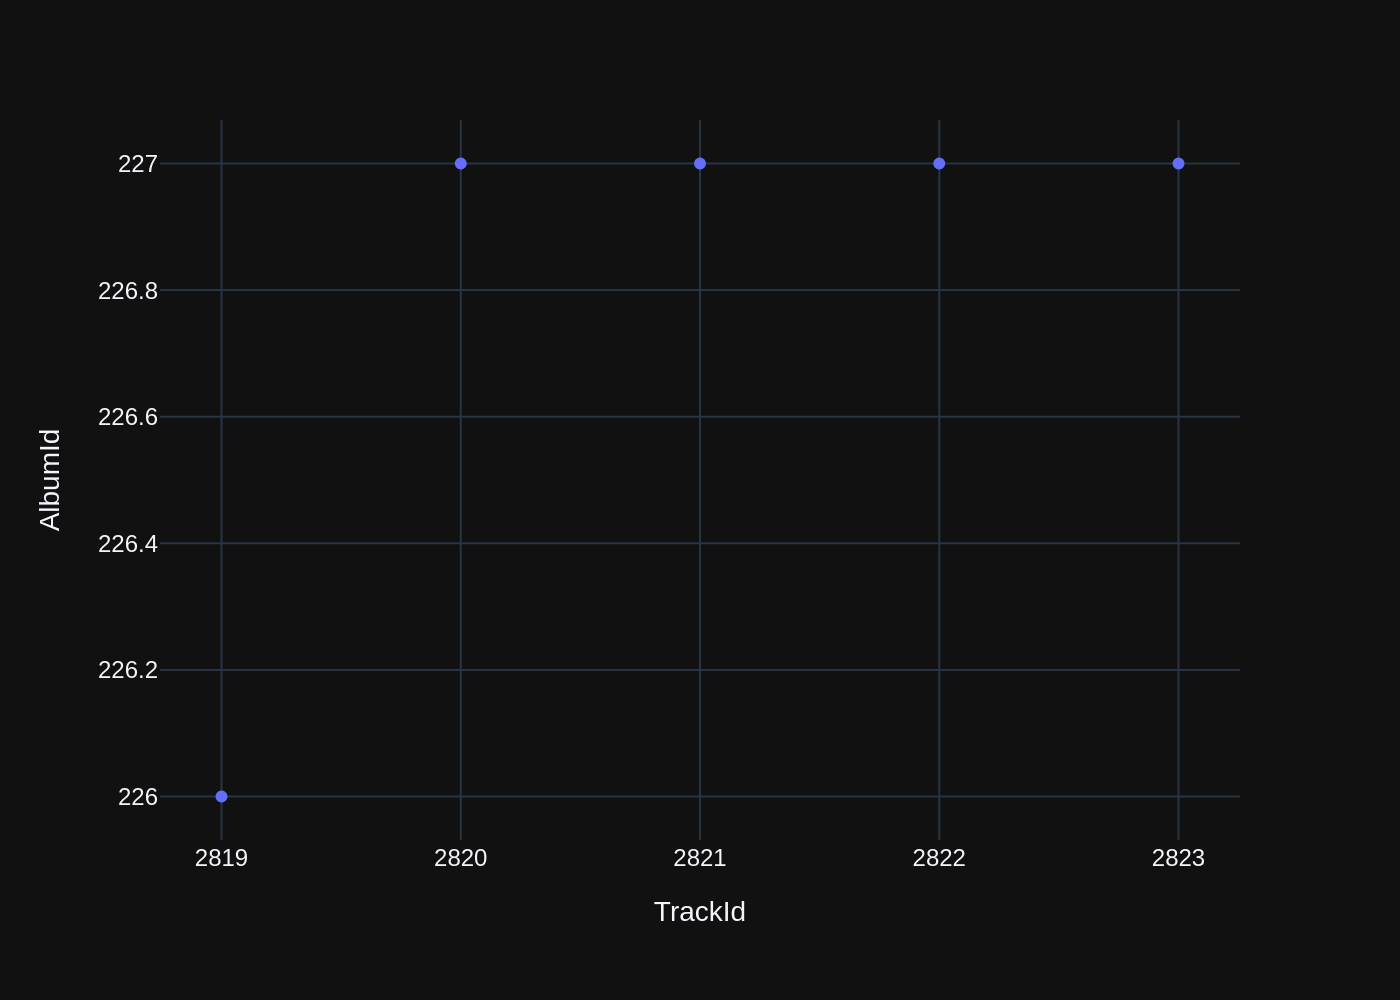

Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 15:  List all genres and the number of tracks in each genre:


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "tracks"\r\n(\r\n    TrackId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Name NVARCHAR(200)  NOT NULL,\r\n    AlbumId INTEGER,\r\n    MediaTypeId INTEGER  NOT NULL,\r\n    GenreId INTEGER,\r\n    Composer NVARCHAR(220),\r\n    Milliseconds INTEGER  NOT NULL,\r\n    Bytes INTEGER,\r\n    UnitPrice NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (AlbumId) REFERENCES "albums" (AlbumId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (GenreId) REFERENCES "genres" (GenreId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (MediaTypeId) REFERENCES "media_types" (MediaTypeId) \r\n\t\tON DELETE NO ACTION 

SELECT Genre.Name, COUNT(Track.GenreId) AS NumberOfTracks
FROM Tracks AS Track
JOIN Genres AS Genre ON Track.GenreId = Genre.GenreId
GROUP BY Genre.Name


[( DATA )]
queried dataframe


,Name,NumberOfTracks
0,Alternative,40
1,Alternative & Punk,332
2,Blues,81
3,Bossa Nova,15
4,Classical,74
5,Comedy,17
6,Drama,64
7,Easy Listening,24
8,Electronica/Dance,30
9,Heavy Metal,28



[( Ollama Parameters )]

      model=granite-code:8b ,
      options={} ,
      keep_alive=None
    

[( Ollama Prompt )]
[{"role": "system", "content": "The following is a pandas DataFrame that contains the results of the query that answers the question the user asked: 'List all genres and the number of tracks in each genre:'\n\nThe DataFrame was produced using this query: SELECT Genre.Name, COUNT(Track.GenreId) AS NumberOfTracks\nFROM Tracks AS Track\nJOIN Genres AS Genre ON Track.GenreId = Genre.GenreId\nGROUP BY Genre.Name\n\n\n\n\n\n\nThe following is information about the resulting pandas DataFrame 'df': \nRunning df.dtypes gives:\n Name              object\nNumberOfTracks     int64\ndtype: object"}, {"role": "user", "content": "Can you generate the Python plotly code to chart the results of the dataframe? Assume the data is in a pandas dataframe called 'df'. If there is only one value in the dataframe, use an Indicator. Respond with only Python code. Do not answer with any expl

Here is the Python code to create a bar chart using the plotly library:

import plotly.graph_objects as go

fig = go.Figure(data=[go.Bar(x=df['Name'], y=df['NumberOfTracks'])])
fig.update_layout(title='Number of Tracks by Genre', xaxis_title='Genre', yaxis_title='Number of Tracks')


This code will create a bar chart with the genre names on the x-axis and the number of tracks in each genre on the y-axis. The chart will be displayed using the plotly library, which you can install using pip install plotly. If there is only one value in the dataframe, you can use an indicator to display the value. Here is an example of how to do this:

import plotly.graph_objects as go

if len(df) == 1:
    fig = go.Figure(data=[go.Indicator(mode="number+gauge",
        number={'value': df['NumberOfTracks'].iloc[0]},
        title={'text': "Number of Tracks"})])
    fig.update_layout(title='Number of Tracks', xaxis_visible=False, yaxis_visible=False)
else:
    fig = go.Figure(data=[go.Bar(x=df['Name'], y=df['NumberOfTracks'])])
    fig.update_layout(title='Number of Tracks by Genre', xaxis_title='Genre', yaxis_title='Number of Tracks')

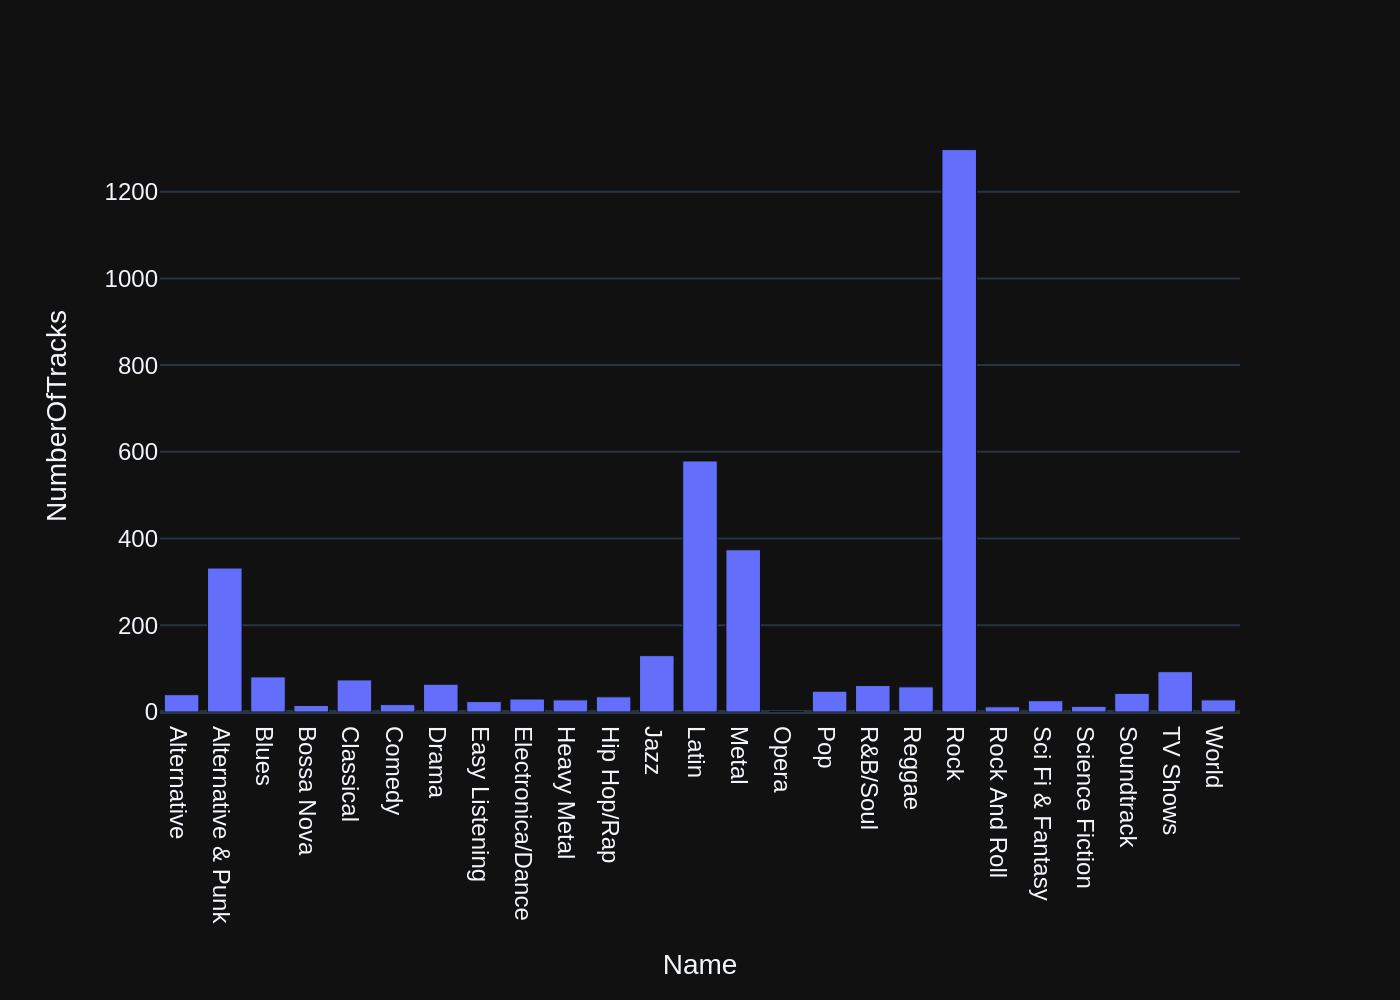

Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 16:  Get all genres that do not have any tracks associated with them:


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE INDEX IFK_TrackGenreId ON "tracks" (GenreId)\n\nCREATE TABLE "tracks"\r\n(\r\n    TrackId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Name NVARCHAR(200)  NOT NULL,\r\n    AlbumId INTEGER,\r\n    MediaTypeId INTEGER  NOT NULL,\r\n    GenreId INTEGER,\r\n    Composer NVARCHAR(220),\r\n    Milliseconds INTEGER  NOT NULL,\r\n    Bytes INTEGER,\r\n    UnitPrice NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (AlbumId) REFERENCES "albums" (AlbumId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (GenreId) REFERENCES "genres" (GenreId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (MediaTypeId) REF

SELECT Genre.Name
FROM Genres AS Genre
LEFT JOIN Tracks AS Track ON Track.GenreId = Genre.GenreId
WHERE Track.TrackId IS NULL


[( DATA )]
queried dataframe


,Name


Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 17:  List all customers who have not placed any orders:


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "invoices"\r\n(\r\n    InvoiceId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    CustomerId INTEGER  NOT NULL,\r\n    InvoiceDate DATETIME  NOT NULL,\r\n    BillingAddress NVARCHAR(70),\r\n    BillingCity NVARCHAR(40),\r\n    BillingState NVARCHAR(40),\r\n    BillingCountry NVARCHAR(40),\r\n    BillingPostalCode NVARCHAR(10),\r\n    Total NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (CustomerId) REFERENCES "customers" (CustomerId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE TABLE "customers"\r\n(\r\n    CustomerId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    FirstName NVARCHAR(40)  NOT NULL,\r\n    LastName NVARCHAR(

SELECT * FROM Customers
WHERE CustomerId NOT IN (
    SELECT CustomerId FROM Invoices
)


[( DATA )]
queried dataframe


,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId


Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 18:   
        Can you find the top 10 most popular artists based on the number of tracks?
        Hint: There are 3 tables - artists, albums and tracks, 
        where albums and artists are linked by ArtistId, albums and tracks are linked by AlbumId,
    


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "tracks"\r\n(\r\n    TrackId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Name NVARCHAR(200)  NOT NULL,\r\n    AlbumId INTEGER,\r\n    MediaTypeId INTEGER  NOT NULL,\r\n    GenreId INTEGER,\r\n    Composer NVARCHAR(220),\r\n    Milliseconds INTEGER  NOT NULL,\r\n    Bytes INTEGER,\r\n    UnitPrice NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (AlbumId) REFERENCES "albums" (AlbumId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FORE

SELECT Top(10) * FROM (
  SELECT *, ROW_NUMBER() OVER(ORDER BY COUNT(*) DESC) as Rank
  FROM Artists
    JOIN Albums on Artists.ArtistId = Albums.ArtistId
    JOIN Tracks on Albums.AlbumId = Tracks.AlbumId
  GROUP BY Artists.ArtistId
) as RankedArtists WHERE Rank <= 10

Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2


*** RETRY 1 ***

[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "tracks"\r\n(\r\n    TrackId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Name NVARCHAR(200)  NOT NULL,\r\n    AlbumId INTEGER,\r\n    MediaTypeId INTEGER  NOT NULL,\r\n    GenreId INTEGER,\r\n    Composer NVARCHAR(220),\r\n    Milliseconds INTEGER  NOT NULL,\r\n    Bytes INTEGER,\r\n    UnitPrice NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (AlbumId) REFERENCES "albums" (AlbumId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (GenreId) REFERENCES "genres" (GenreId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (MediaTypeId) REFERENCES "media_types" (MediaTypeId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE TABLE "albums"\r\n(\r\n  

SELECT *
FROM (
  SELECT *, ROW_NUMBER() OVER(ORDER BY COUNT(*) DESC) as Rank
  FROM Artists
    JOIN Albums on Artists.ArtistId = Albums.ArtistId
    JOIN Tracks on Albums.AlbumId = Tracks.AlbumId
  GROUP BY Artists.ArtistId
) as RankedArtists WHERE Rank <= 10


[( DATA )]
queried dataframe


,ArtistId,Name,AlbumId,Title,ArtistId:1,TrackId,Name:1,AlbumId:1,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice,Rank
0,90,Iron Maiden,94,A Matter of Life and Death,90,1201,Different World,94,2,1,None,258692,4383764,0.99,1
1,150,U2,232,Achtung Baby,150,2926,Zoo Station,232,1,1,U2,276349,9056902,0.99,2
2,22,Led Zeppelin,30,BBC Sessions [Disc 1] [Live],22,337,You Shook Me,30,1,1,J B Lenoir/Willie Dixon,315951,10249958,0.99,3
3,50,Metallica,35,Garage Inc. (Disc 1),50,408,Free Speech For The Dumb,35,1,3,Molaney/Morris/Roberts/Wainwright,155428,5076048,0.99,4
4,58,Deep Purple,43,MK III The Final Concerts [Disc 1],58,543,Burn,43,1,1,Coverdale/Lord/Paice,453955,14775708,0.99,5
5,149,Lost,229,"Lost, Season 3",149,2857,A Tale of Two Cities,229,3,19,None,2636970,513691652,1.99,6
6,118,Pearl Jam,178,Live On Two Legs [Live],118,2149,Corduroy,178,1,1,Pearl Jam & Eddie Vedder,305293,9991106,0.99,7
7,100,Lenny Kravitz,141,Greatest Hits,100,1702,Are You Gonna Go My Way,141,1,1,Craig Ross/Lenny Kravitz,211591,6905135,0.99,8
8,21,Various Artists,29,Axé Bahia 2001,21,323,"Dig-Dig, Lambe-Lambe (Ao Vivo)",29,1,9,Cassiano Costa/Cintia Maviane/J.F./Lucas Costa,205479,6892516,0.99,9
9,156,The Office,249,"The Office, Season 1",156,3172,The Office: An American Workplace (Pilot),249,3,19,None,1380833,290482361,1.99,10



[( Ollama Parameters )]

      model=granite-code:8b ,
      options={} ,
      keep_alive=None
    

[( Ollama Prompt )]
[{"role": "system", "content": "The following is a pandas DataFrame that contains the results of the query that answers the question the user asked: '\n        For the question  \n        Can you find the top 10 most popular artists based on the number of tracks?\n        Hint: There are 3 tables - artists, albums and tracks, \n        where albums and artists are linked by ArtistId, albums and tracks are linked by AlbumId,\n    , \n        the generated SQL statement SELECT Top(10) * FROM (\n  SELECT *, ROW_NUMBER() OVER(ORDER BY COUNT(*) DESC) as Rank\n  FROM Artists\n    JOIN Albums on Artists.ArtistId = Albums.ArtistId\n    JOIN Tracks on Albums.AlbumId = Tracks.AlbumId\n  GROUP BY Artists.ArtistId\n) as RankedArtists WHERE Rank <= 10\n\n\n\n\n results in the following exception [ERROR-DB] Failed to execute SQL: SELECT Top(10) * FROM (\n  SELECT *, ROW_NUMBER()

import plotly.express as px
fig = px.bar(df, x="Name", y="Count")

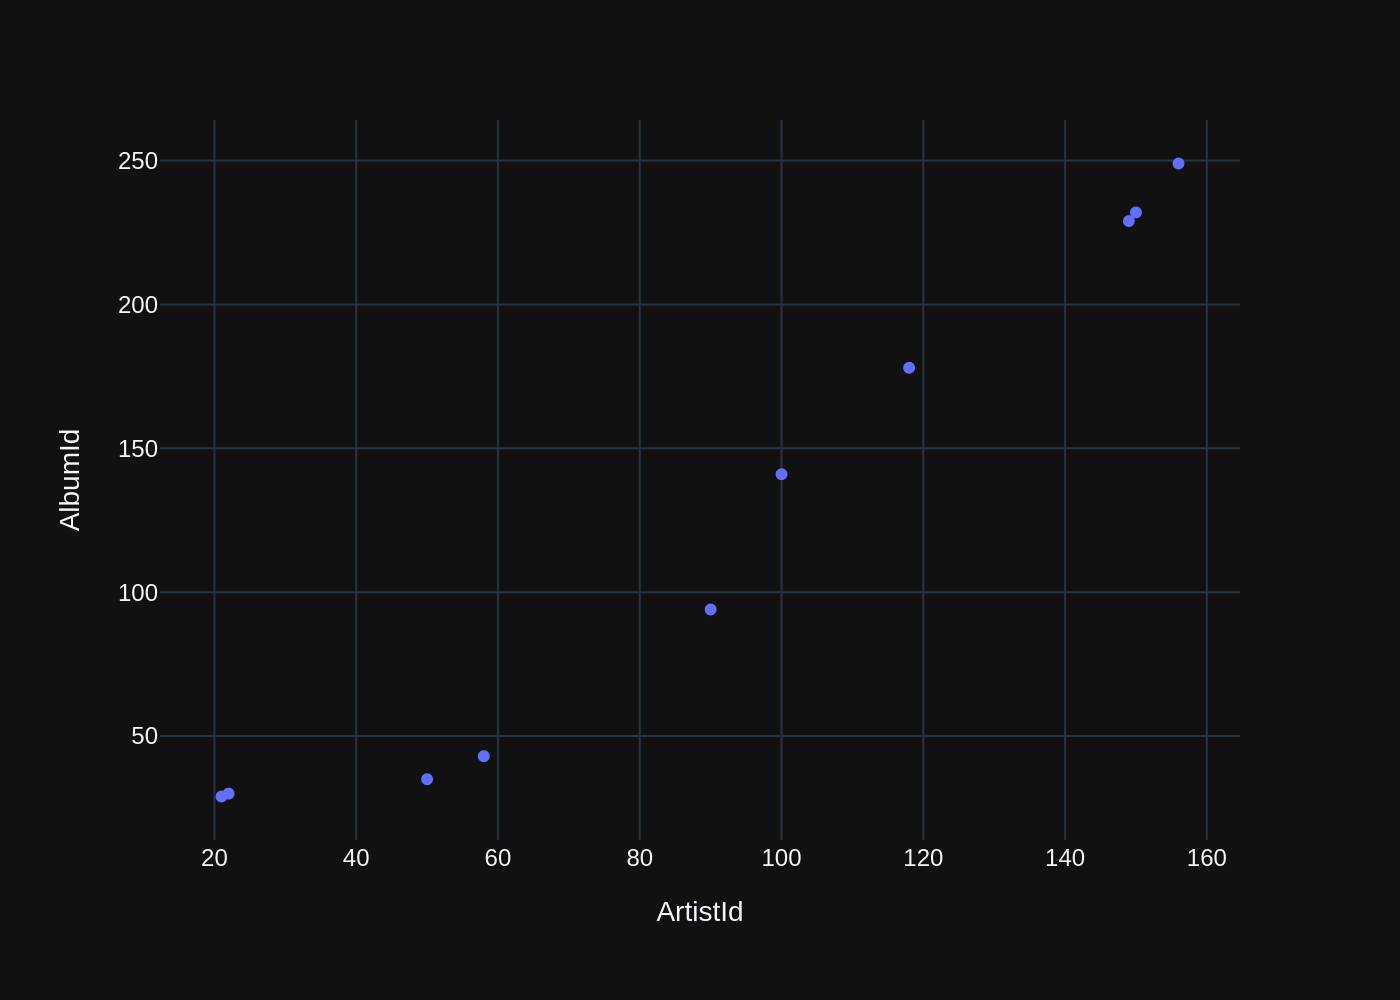

Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 19:  List all customers from Canada and their email addresses:


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE INDEX IFK_CustomerSupportRepId ON "customers" (SupportRepId)\n\nCREATE TABLE "customers"\r\n(\r\n    CustomerId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    FirstName NVARCHAR(40)  NOT NULL,\r\n    LastName NVARCHAR(20)  NOT NULL,\r\n    Company NVARCHAR(80),\r\n    Address NVARCHAR(70),\r\n    City NVARCHAR(40),\r\n    State NVARCHAR(40),\r\n    Country NVARCHAR(40),\r\n    PostalCode NVARCHAR(10),\r\n    Phone NVARCHAR(24),\r\n    Fax NVARCHAR(24),\r\n    Email NVARCHAR(60)  NOT NULL,\r\n    SupportRepId INTEGER,\r\n    FOREIGN KEY (SupportRepId) REFERENCES "employees" (EmployeeId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\

SELECT * FROM Customers 
WHERE Country = 'Canada'
SELECT Email FROM Customers 
WHERE Country = 'Canada'

Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2


*** RETRY 1 ***

[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "customers"\r\n(\r\n    CustomerId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    FirstName NVARCHAR(40)  NOT NULL,\r\n    LastName NVARCHAR(20)  NOT NULL,\r\n    Company NVARCHAR(80),\r\n    Address NVARCHAR(70),\r\n    City NVARCHAR(40),\r\n    State NVARCHAR(40),\r\n    Country NVARCHAR(40),\r\n    PostalCode NVARCHAR(10),\r\n    Phone NVARCHAR(24),\r\n    Fax NVARCHAR(24),\r\n    Email NVARCHAR(60)  NOT NULL,\r\n    SupportRepId INTEGER,\r\n    FOREIGN KEY (SupportRepId) REFERENCES "employees" (EmployeeId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE TABLE "employees"\r\n(\r\n    EmployeeId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    LastName NVARCHAR(20)  NOT NULL

SELECT *
FROM Customers
WHERE Country = 'Canada'
SELECT Email
FROM Customers
WHERE Country = 'Canada'

Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2


*** RETRY 2 ***

[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "customers"\r\n(\r\n    CustomerId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    FirstName NVARCHAR(40)  NOT NULL,\r\n    LastName NVARCHAR(20)  NOT NULL,\r\n    Company NVARCHAR(80),\r\n    Address NVARCHAR(70),\r\n    City NVARCHAR(40),\r\n    State NVARCHAR(40),\r\n    Country NVARCHAR(40),\r\n    PostalCode NVARCHAR(10),\r\n    Phone NVARCHAR(24),\r\n    Fax NVARCHAR(24),\r\n    Email NVARCHAR(60)  NOT NULL,\r\n    SupportRepId INTEGER,\r\n    FOREIGN KEY (SupportRepId) REFERENCES "employees" (EmployeeId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE TABLE sqlite_sequence(name,seq)\n\nCREATE TABLE "employees"\r\n(\r\n    EmployeeId INTEGER PRIMARY KEY AUTOINCREMENT NOT NU

SELECT *
FROM customers
WHERE country = 'canada'
SELECT email
FROM customers
WHERE country = 'canada'

Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 20:  Find the customer with the most invoices 


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "invoices"\r\n(\r\n    InvoiceId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    CustomerId INTEGER  NOT NULL,\r\n    InvoiceDate DATETIME  NOT NULL,\r\n    BillingAddress NVARCHAR(70),\r\n    BillingCity NVARCHAR(40),\r\n    BillingState NVARCHAR(40),\r\n    BillingCountry NVARCHAR(40),\r\n    BillingPostalCode NVARCHAR(10),\r\n    Total NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (CustomerId) REFERENCES "customers" (CustomerId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE INDEX IFK_InvoiceCustomerId ON "invoices" (CustomerId)\n\nCREATE INDEX IFK_InvoiceLineInvoiceId ON "invoice_items" (InvoiceId)\n\nCREATE TABLE "invoice_items"\r

SELECT CustomerId, COUNT(*) as NumberOfInvoices
FROM Invoices
GROUP BY CustomerId
ORDER BY NumberOfInvoices DESC
LIMIT 1


[( DATA )]
queried dataframe


,CustomerId,NumberOfInvoices
0,1,7



[( Ollama Parameters )]

      model=granite-code:8b ,
      options={} ,
      keep_alive=None
    

[( Ollama Prompt )]
[{"role": "system", "content": "The following is a pandas DataFrame that contains the results of the query that answers the question the user asked: 'Find the customer with the most invoices '\n\nThe DataFrame was produced using this query: SELECT CustomerId, COUNT(*) as NumberOfInvoices\nFROM Invoices\nGROUP BY CustomerId\nORDER BY NumberOfInvoices DESC\nLIMIT 1\n\n\n\n\nThe following is information about the resulting pandas DataFrame 'df': \nRunning df.dtypes gives:\n CustomerId          int64\nNumberOfInvoices    int64\ndtype: object"}, {"role": "user", "content": "Can you generate the Python plotly code to chart the results of the dataframe? Assume the data is in a pandas dataframe called 'df'. If there is only one value in the dataframe, use an Indicator. Respond with only Python code. Do not answer with any explanations -- just the code."}]

[( Ollama Respon

import plotly.express as px

fig = px.bar(df, x="Customer Id", y="Number of Invoices")

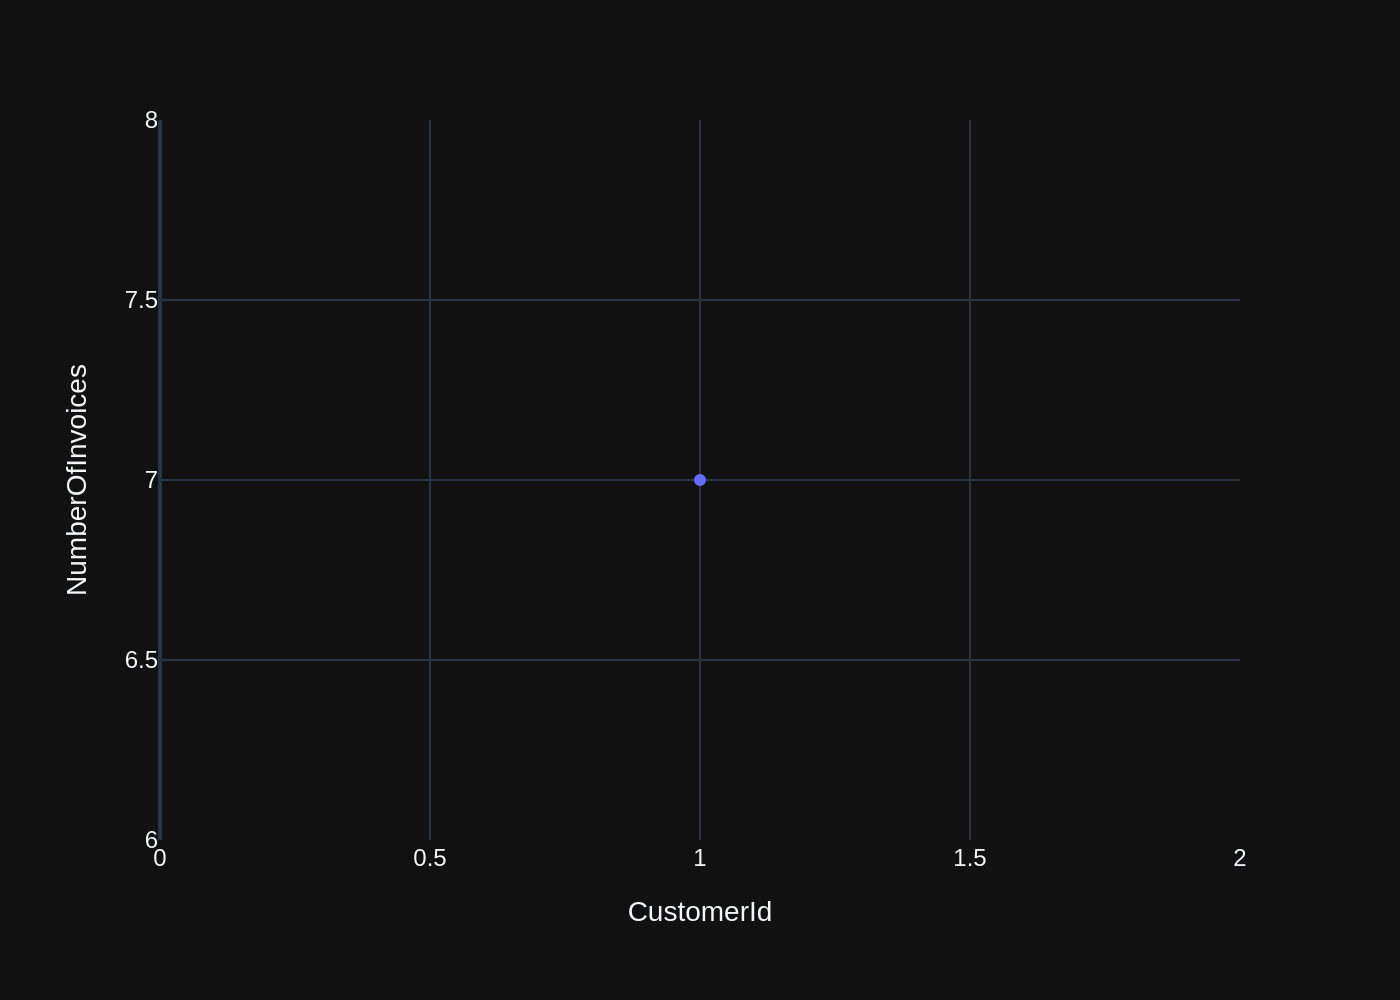

Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 21:  Find the customer who bought the most albums in total quantity (across all invoices):


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "tracks"\r\n(\r\n    TrackId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Name NVARCHAR(200)  NOT NULL,\r\n    AlbumId INTEGER,\r\n    MediaTypeId INTEGER  NOT NULL,\r\n    GenreId INTEGER,\r\n    Composer NVARCHAR(220),\r\n    Milliseconds INTEGER  NOT NULL,\r\n    Bytes INTEGER,\r\n    UnitPrice NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (AlbumId) REFERENCES "albums" (AlbumId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (GenreId) REFERENCES "genres" (GenreId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (MediaTypeId) REFERENCES "media_types" (MediaTypeId

SELECT CustomerId, SUM(Quantity) as TotalQuantityBought
FROM Invoice_Items
GROUP BY CustomerId
ORDER BY TotalQuantityBought DESC
LIMIT 1

Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2


*** RETRY 1 ***

[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "invoices"\r\n(\r\n    InvoiceId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    CustomerId INTEGER  NOT NULL,\r\n    InvoiceDate DATETIME  NOT NULL,\r\n    BillingAddress NVARCHAR(70),\r\n    BillingCity NVARCHAR(40),\r\n    BillingState NVARCHAR(40),\r\n    BillingCountry NVARCHAR(40),\r\n    BillingPostalCode NVARCHAR(10),\r\n    Total NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (CustomerId) REFERENCES "customers" (CustomerId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE TABLE "invoice_items"\r\n(\r\n    InvoiceLineId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    InvoiceId INTEGER  NOT NULL,\r\n    TrackId INTEGER  NOT NULL,\r\n    UnitPrice NUMERIC(10,2)  NOT NULL,\r\

SELECT *
FROM (
  SELECT CustomerId, SUM(Quantity) as TotalQuantityBought
  FROM Invoice_Items
  GROUP BY CustomerId
) as TotalQuantityByCustomer
ORDER BY TotalQuantityBought DESC
LIMIT 1

Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2


*** RETRY 2 ***

[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "invoice_items"\r\n(\r\n    InvoiceLineId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    InvoiceId INTEGER  NOT NULL,\r\n    TrackId INTEGER  NOT NULL,\r\n    UnitPrice NUMERIC(10,2)  NOT NULL,\r\n    Quantity INTEGER  NOT NULL,\r\n    FOREIGN KEY (InvoiceId) REFERENCES "invoices" (InvoiceId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (TrackId) REFERENCES "tracks" (TrackId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE TABLE "invoices"\r\n(\r\n    InvoiceId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    CustomerId INTEGER  NOT NULL,\r\n    InvoiceDate DATETIME  NOT NULL,\r\n    BillingAddress NVARCHAR(70),\r\n    BillingCity NVARCHAR(40),\r\n    Bi

Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2


[ERROR-SQL] Failed to generate SQL for prompt: 
        For the question 
        For the question Find the customer who bought the most albums in total quantity (across all invoices):, 
        the generated SQL statement SELECT CustomerId, SUM(Quantity) as TotalQuantityBought
FROM Invoice_Items
GROUP BY CustomerId
ORDER BY TotalQuantityBought DESC
LIMIT 1




 results in the following exception [ERROR-DB] Failed to execute SQL: SELECT CustomerId, SUM(Quantity) as TotalQuantityBought
FROM Invoice_Items
GROUP BY CustomerId
ORDER BY TotalQuantityBought DESC
LIMIT 1





 Execution failed on sql 'SELECT CustomerId, SUM(Quantity) as TotalQuantityBought
FROM Invoice_Items
GROUP BY CustomerId
ORDER BY TotalQuantityBought DESC
LIMIT 1




': no such column: CustomerId .
        Please fix the error and re-generate the SQL
        , 
        the generated SQL statement SELECT *
FROM (
  SELECT CustomerId, SUM(Quantity) as TotalQuantityBought
  FROM Invoice_Items
  GROUP BY CustomerId
) as Tot

SELECT Customer.Name, SUM(InvoiceItem.Quantity) as TotalAlbumQuantity
FROM Customers
JOIN Invoices on Customers.CustomerId = Invoices.CustomerId
JOIN InvoiceItems on Invoices.InvoiceId = InvoiceItems.InvoiceId
GROUP BY Customer.Name
ORDER BY TotalAlbumQuantity DESC
LIMIT 5

Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2


*** RETRY 1 ***

[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "invoice_items"\r\n(\r\n    InvoiceLineId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    InvoiceId INTEGER  NOT NULL,\r\n    TrackId INTEGER  NOT NULL,\r\n    UnitPrice NUMERIC(10,2)  NOT NULL,\r\n    Quantity INTEGER  NOT NULL,\r\n    FOREIGN KEY (InvoiceId) REFERENCES "invoices" (InvoiceId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (TrackId) REFERENCES "tracks" (TrackId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE TABLE "invoices"\r\n(\r\n    InvoiceId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    CustomerId INTEGER  NOT NULL,\r\n    InvoiceDate DATETIME  NOT NULL,\r\n    BillingAddress NVARCHAR(70),\r\n    BillingCity NVARCHAR(40),\r\n    Bi

SELECT Customer.Name, SUM(InvoiceItem.Quantity) as TotalAlbumQuantity
FROM Customers
JOIN Invoices on Customers.CustomerId = Invoices.CustomerId
JOIN InvoiceItems on Invoices.InvoiceId = InvoiceItems.InvoiceId
GROUP BY Customer.Name
ORDER BY TotalAlbumQuantity DESC
LIMIT 5

Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2


*** RETRY 2 ***

[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "invoices"\r\n(\r\n    InvoiceId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    CustomerId INTEGER  NOT NULL,\r\n    InvoiceDate DATETIME  NOT NULL,\r\n    BillingAddress NVARCHAR(70),\r\n    BillingCity NVARCHAR(40),\r\n    BillingState NVARCHAR(40),\r\n    BillingCountry NVARCHAR(40),\r\n    BillingPostalCode NVARCHAR(10),\r\n    Total NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (CustomerId) REFERENCES "customers" (CustomerId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE TABLE "invoice_items"\r\n(\r\n    InvoiceLineId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    InvoiceId INTEGER  NOT NULL,\r\n    TrackId INTEGER  NOT NULL,\r\n    UnitPrice NUMERIC(10,2)  NOT NULL,\r\

Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2


[ERROR-SQL] Failed to generate SQL for prompt: 
        For the question 
        For the question       
        Find the top 5 customers who bought the most albums in total quantity (across all invoices):
        Hint: album quantity is found in invoice_items, 
    , 
        the generated SQL statement SELECT Customer.Name, SUM(InvoiceItem.Quantity) as TotalAlbumQuantity
FROM Customers
JOIN Invoices on Customers.CustomerId = Invoices.CustomerId
JOIN InvoiceItems on Invoices.InvoiceId = InvoiceItems.InvoiceId
GROUP BY Customer.Name
ORDER BY TotalAlbumQuantity DESC
LIMIT 5
 results in the following exception [ERROR-DB] Failed to execute SQL: SELECT Customer.Name, SUM(InvoiceItem.Quantity) as TotalAlbumQuantity
FROM Customers
JOIN Invoices on Customers.CustomerId = Invoices.CustomerId
JOIN InvoiceItems on Invoices.InvoiceId = InvoiceItems.InvoiceId
GROUP BY Customer.Name
ORDER BY TotalAlbumQuantity DESC
LIMIT 5

 Execution failed on sql 'SELECT Customer.Name, SUM(InvoiceItem.Quantity) 

SELECT CustomerId, SUM(Total) as Totalspent
FROM Invoices
GROUP BY CustomerId
ORDER BY Totalspent DESC
LIMIT 5


[( DATA )]
queried dataframe


,CustomerId,Totalspent
0,6,49.62
1,26,47.62
2,57,46.62
3,45,45.62
4,46,45.62



[( Ollama Parameters )]

      model=granite-code:8b ,
      options={} ,
      keep_alive=None
    

[( Ollama Prompt )]
[{"role": "system", "content": "The following is a pandas DataFrame that contains the results of the query that answers the question the user asked: '  \n         Find the top 5 customers who spent the most money overall,  \n         Hint: order total can be found on invoices table, calculation using invoice_items detail table is unnecessary \n    '\n\nThe DataFrame was produced using this query: SELECT CustomerId, SUM(Total) as Totalspent\nFROM Invoices\nGROUP BY CustomerId\nORDER BY Totalspent DESC\nLIMIT 5\n\n\nThe following is information about the resulting pandas DataFrame 'df': \nRunning df.dtypes gives:\n CustomerId      int64\nTotalspent    float64\ndtype: object"}, {"role": "user", "content": "Can you generate the Python plotly code to chart the results of the dataframe? Assume the data is in a pandas dataframe called 'df'. If there is only one value in t

import plotly.express as px

fig = px.bar(data_frame=df, x="Totalspent", y="CustomerId")

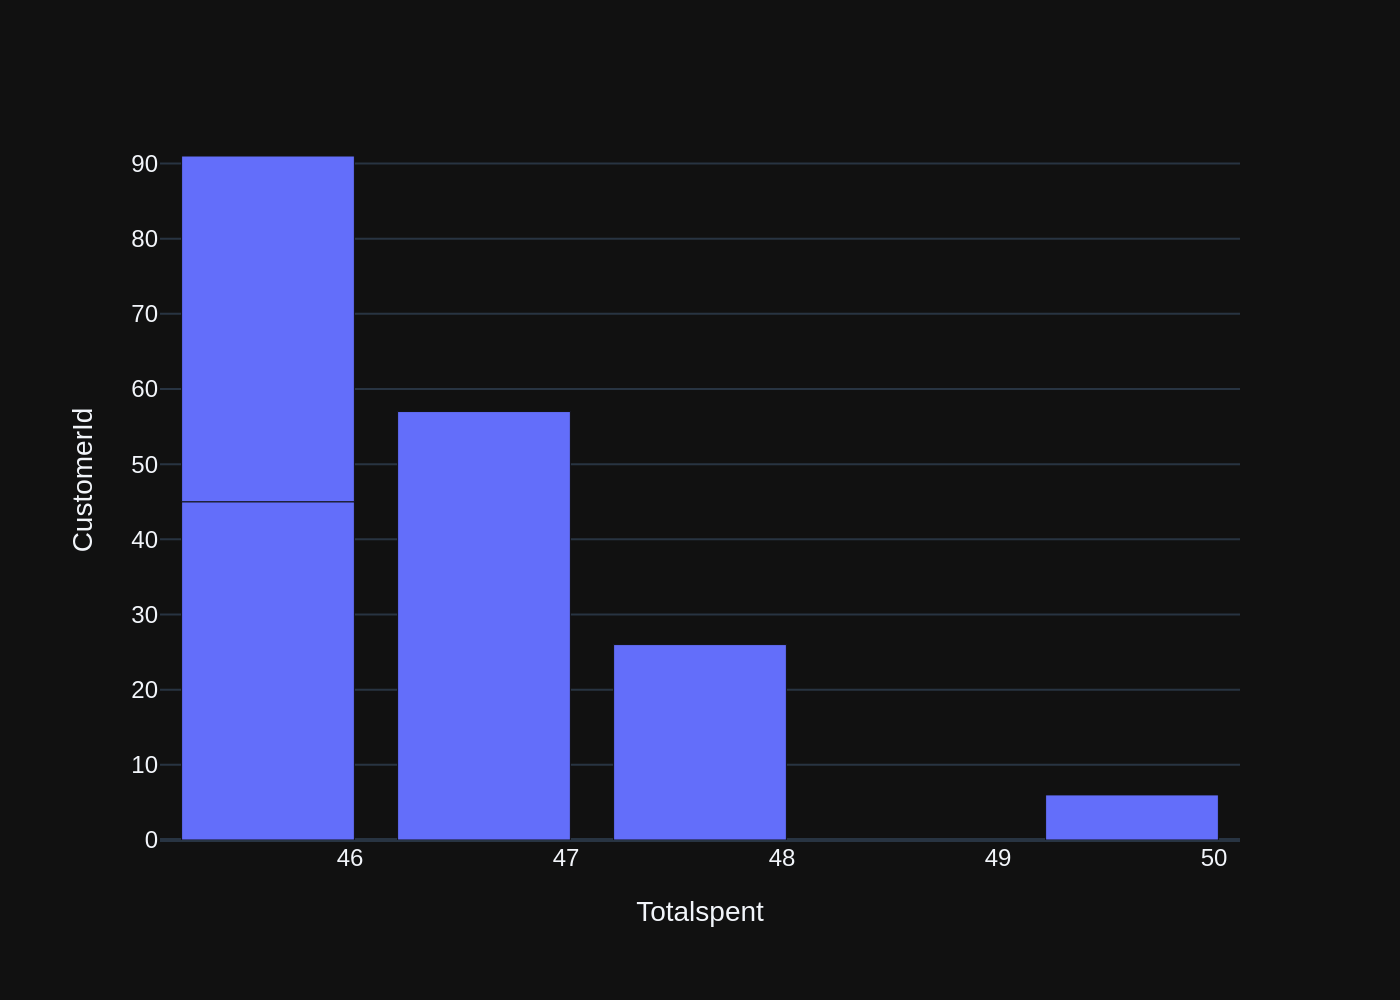

Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 24:  Get all playlists containing at least 10 tracks and the total duration of those tracks:


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE INDEX IFK_PlaylistTrackTrackId ON "playlist_track" (TrackId)\n\nCREATE TABLE "playlists"\r\n(\r\n    PlaylistId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Name NVARCHAR(120)\r\n)\n\nCREATE TABLE "playlist_track"\r\n(\r\n    PlaylistId INTEGER  NOT NULL,\r\n    TrackId INTEGER  NOT NULL,\r\n    CONSTRAINT PK_PlaylistTrack PRIMARY KEY  (PlaylistId, TrackId),\r\n    FOREIGN KEY (PlaylistId) REFERENCES "playlists" (PlaylistId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (TrackId) REFERENCES "tracks" (TrackId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE TABLE "tracks"

SELECT *
FROM (
  SELECT *, ROW_NUMBER() OVER(ORDER BY COUNT(*) DESC) as Rank
  FROM Playlists
    JOIN PlaylistTracks on Playlists.PlaylistId = PlaylistTracks.PlaylistId
  GROUP BY Playlists.PlaylistId
) as RankedPlaylists WHERE Rank <= 10 AND TrackCount >= 10

Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2


*** RETRY 1 ***

[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "playlist_track"\r\n(\r\n    PlaylistId INTEGER  NOT NULL,\r\n    TrackId INTEGER  NOT NULL,\r\n    CONSTRAINT PK_PlaylistTrack PRIMARY KEY  (PlaylistId, TrackId),\r\n    FOREIGN KEY (PlaylistId) REFERENCES "playlists" (PlaylistId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (TrackId) REFERENCES "tracks" (TrackId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE TABLE "playlists"\r\n(\r\n    PlaylistId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Name NVARCHAR(120)\r\n)\n\nCREATE INDEX IFK_PlaylistTrackTrackId ON "playlist_track" (TrackId)\n\nCREATE TABLE "tracks"\r\n(\r\n    TrackId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Name NVARCHAR(200)  

Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2


[ERROR-SQL] Failed to generate SQL for prompt: 
        For the question Get all playlists containing at least 10 tracks and the total duration of those tracks:, 
        the generated SQL statement SELECT *
FROM (
  SELECT *, ROW_NUMBER() OVER(ORDER BY COUNT(*) DESC) as Rank
  FROM Playlists
    JOIN PlaylistTracks on Playlists.PlaylistId = PlaylistTracks.PlaylistId
  GROUP BY Playlists.PlaylistId
) as RankedPlaylists WHERE Rank <= 10 AND TrackCount >= 10


 results in the following exception [ERROR-DB] Failed to execute SQL: SELECT *
FROM (
  SELECT *, ROW_NUMBER() OVER(ORDER BY COUNT(*) DESC) as Rank
  FROM Playlists
    JOIN PlaylistTracks on Playlists.PlaylistId = PlaylistTracks.PlaylistId
  GROUP BY Playlists.PlaylistId
) as RankedPlaylists WHERE Rank <= 10 AND TrackCount >= 10



 Execution failed on sql 'SELECT *
FROM (
  SELECT *, ROW_NUMBER() OVER(ORDER BY COUNT(*) DESC) as Rank
  FROM Playlists
    JOIN PlaylistTracks on Playlists.PlaylistId = PlaylistTracks.PlaylistId
  GRO

SELECT * FROM Playlists
WHERE TrackCount >= 10 AND TotalDuration >= 100


This is the correct SQL statement for the given prompt. The query selects all playlists that contain at least 10 tracks and have a total duration of at least 100 minutes. The "TrackCount" column represents the number of tracks in each playlist, while the "TotalDuration" column represents the total duration of all tracks in the playlist.

Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 25:  Identify artists who have albums with tracks appearing in multiple genres:


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "tracks"\r\n(\r\n    TrackId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Name NVARCHAR(200)  NOT NULL,\r\n    AlbumId INTEGER,\r\n    MediaTypeId INTEGER  NOT NULL,\r\n    GenreId INTEGER,\r\n    Composer NVARCHAR(220),\r\n    Milliseconds INTEGER  NOT NULL,\r\n    Bytes INTEGER,\r\n    UnitPrice NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (AlbumId) REFERENCES "albums" (AlbumId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (GenreId) REFERENCES "genres" (GenreId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (MediaTypeId) REFERENCES "media_types" (MediaTypeId) \r\n\t\tO

SELECT Artist.Name, COUNT(DISTINCT Genre.Name) as NumberOfGenres
FROM Artists
  JOIN Albums on Artists.ArtistId = Albums.ArtistId
  JOIN Tracks on Albums.AlbumId = Tracks.AlbumId
  JOIN Genres on Tracks.GenreId = Genres.GenreId
GROUP BY Artist.Name
HAVING COUNT(DISTINCT Genre.Name) > 1

Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2


*** RETRY 1 ***

[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "albums"\r\n(\r\n    AlbumId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Title NVARCHAR(160)  NOT NULL,\r\n    ArtistId INTEGER  NOT NULL,\r\n    FOREIGN KEY (ArtistId) REFERENCES "artists" (ArtistId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE TABLE "tracks"\r\n(\r\n    TrackId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Name NVARCHAR(200)  NOT NULL,\r\n    AlbumId INTEGER,\r\n    MediaTypeId INTEGER  NOT NULL,\r\n    GenreId INTEGER,\r\n    Composer NVARCHAR(220),\r\n    Milliseconds INTEGER  NOT NULL,\r\n    Bytes INTEGER,\r\n    UnitPrice NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (AlbumId) REFERENCES "albums" (AlbumId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO

SELECT Artist.Name, COUNT(*) as NumberOfGenres
FROM Artists
  JOIN Albums on Artists.ArtistId = Albums.ArtistId
  JOIN Tracks on Albums.AlbumId = Tracks.AlbumId
  JOIN Genres on Tracks.GenreId = Genres.GenreId
GROUP BY Artist.Name
HAVING COUNT(DISTINCT Genre.Name) > 1

Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2


*** RETRY 2 ***

[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "albums"\r\n(\r\n    AlbumId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Title NVARCHAR(160)  NOT NULL,\r\n    ArtistId INTEGER  NOT NULL,\r\n    FOREIGN KEY (ArtistId) REFERENCES "artists" (ArtistId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE TABLE "tracks"\r\n(\r\n    TrackId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Name NVARCHAR(200)  NOT NULL,\r\n    AlbumId INTEGER,\r\n    MediaTypeId INTEGER  NOT NULL,\r\n    GenreId INTEGER,\r\n    Composer NVARCHAR(220),\r\n    Milliseconds INTEGER  NOT NULL,\r\n    Bytes INTEGER,\r\n    UnitPrice NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (AlbumId) REFERENCES "albums" (AlbumId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO

SELECT * FROM Artists
  JOIN Albums on Artists.ArtistId = Albums.ArtistId
  JOIN Tracks on Albums.AlbumId = Tracks.AlbumId
  JOIN Genres on Tracks.GenreId = Genres.GenreId
GROUP BY Artist.Name
HAVING COUNT(DISTINCT Genre.Name) > 1

In [15]:
for n, question in enumerate(questions):
    # if n != 4: continue
    
    # if n > 5: continue
        
    my_vn_ask(question=question, sql_id=n+2, allow_llm_to_see_data=allow_llm_to_see_data)

### Check completion time

In [16]:
ts_stop = time()
elapsed_time = ts_stop - ts_start
str_elapsed_sec = f"{elapsed_time:.0f}"
ts = datetime.now().strftime("%Y%m%d-%H%M%S")
print(f"Completed testing:\n================\n LLM model '{model_name}' \n took {str_elapsed_sec} sec\n run on '{hostname}' \n at {ts}")

Completed testing:
 LLM model 'granite-code:8b' 
 took 5752 sec
 run on 'ducklover1' 
 at 20241013-132043


In [17]:
file_csv = f"training_data-{model_name}-{str_elapsed_sec}s-{hostname}-{ts}.csv"
file_csv

'training_data-granite-code:8b-5752s-ducklover1-20241013-132043.csv'

### Save training data

In [18]:
# show training data
df_training_data = vn.get_training_data()
df_training_data

,id,question,content,training_data_type
0,2cc4ea45-c758-5369-967e-242bb1d58b49-sql,Get the total number of invoices for each cust...,"SELECT CustomerId, COUNT(*) as NumberOfInvoice...",sql
1,3418eb2d-2059-5c63-85a3-3bf24c5c3712-sql,what are the top 5 countries that customers co...,"SELECT Country, COUNT(*) as NumberOfCustomers\...",sql
2,457c3312-48b1-5475-9392-3e92816a30fb-sql,Get the average invoice total for each customer:,"SELECT CustomerId, AVG(Total) as AverageInvoic...",sql
3,731c2a47-ac2e-5e49-b15e-9be10226b1da-sql,List all albums and their corresponding artist...,"SELECT Album.Title, Artist.Name\nFROM Albums a...",sql
4,83799c13-48aa-5aeb-be80-cbca82fd223e-sql,List all invoices with a total exceeding $10,SELECT *\nFROM Invoices\nWHERE Total > 10\n\n\n,sql
5,8947dd40-ae50-55be-9473-724b67eea386-sql,List all employees and their reporting manager...,"SELECT Employee.LastName, Employee.FirstName, ...",sql
6,8f1d9ed4-a541-5574-a314-c8305bef014c-sql,Find the customer with the most invoices,"SELECT CustomerId, COUNT(*) as NumberOfInvoice...",sql
7,8f534062-3563-58b3-aace-8be735c8e009-sql,Find all invoices since 2010 and the total amo...,SELECT *\nFROM Invoices\nWHERE InvoiceDate >= ...,sql
8,a2babc52-d102-566f-83d6-cced3e6b35fa-sql,\n For the question \n Can you ...,"SELECT *\nFROM (\n SELECT *, ROW_NUMBER() OVE...",sql
9,ad5ad646-1638-540b-9010-4ebf66d688b8-sql,"Find all tracks with a name containing ""What"" ...",SELECT Name\nFROM Tracks\nWHERE Name LIKE '%wh...,sql


In [19]:
df_training_data.to_csv(file_csv, index=False)